<h1> Australian International Aviation Traffic: An Exploratory Analysis!✈️</h1>


<h2>Project Overview</h2>

This project presents an exploratory data analysis of international aviation traffic between Australia and foreign ports over a 41-year period (1985-2025). 

The dataset includes monthly records of passenger volumes, freight tonnage, and mail tonnage, covering all major Australian international airports and their global connections.

The analysis focuses on identifying long-term traffic trends, highlighting the busiest international routes and city pairs, uncovering seasonal and cyclical patterns, and examining the geographic distribution of air traffic. 

It also compares the dynamics of passenger, freight, and mail transport, and assesses the impact of major global events, such as economic crises and the COVID-19 pandemic, on international aviation activity.

<h3>1. Importing, Loading and Initial Analysis</h3>

In [385]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
from datetime import datetime
import calendar

# Set up plotting configurations
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotly default theme for colorful visualizations
import plotly.io as pio
pio.templates.default = "plotly"

print("Libraries imported successfully!")

Libraries imported successfully!


In [387]:
# Load the dataset
df = pd.read_csv('city_pairs.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (89320, 15)

Column Names:
['Month', 'AustralianPort', 'ForeignPort', 'Country', 'Passengers_In', 'Freight_In_(tonnes)', 'Mail_In_(tonnes)', 'Passengers_Out', 'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)', 'Passengers_Total', 'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)', 'Year', 'Month_num']

Data Types:
Month                      object
AustralianPort             object
ForeignPort                object
Country                    object
Passengers_In               int64
Freight_In_(tonnes)       float64
Mail_In_(tonnes)          float64
Passengers_Out              int64
Freight_Out_(tonnes)      float64
Mail_Out_(tonnes)         float64
Passengers_Total            int64
Freight_Total_(tonnes)    float64
Mail_Total_(tonnes)       float64
Year                        int64
Month_num                   int64
dtype: object

First 5 rows:


,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [389]:
# Detailed dataset exploration
print("Dataset Information:")
print("="*50)
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")
print(f"Time Period: {df['Year'].min()} - {df['Year'].max()}")
print(f"Total Years: {df['Year'].nunique()} years")

print("\nUnique Values per Column:")
print("="*50)
for col in df.columns:
    print(f"{col}: {df[col].nunique():,} unique values")

print("\nLast 5 rows:")
df.tail()

Dataset Information:
Total Records: 89,320
Total Columns: 15
Time Period: 1985 - 2025
Total Years: 41 years

Unique Values per Column:
Month: 482 unique values
AustralianPort: 19 unique values
ForeignPort: 200 unique values
Country: 78 unique values
Passengers_In: 18,412 unique values
Freight_In_(tonnes): 51,040 unique values
Mail_In_(tonnes): 18,481 unique values
Passengers_Out: 18,364 unique values
Freight_Out_(tonnes): 50,507 unique values
Mail_Out_(tonnes): 16,195 unique values
Passengers_Total: 25,835 unique values
Freight_Total_(tonnes): 59,370 unique values
Mail_Total_(tonnes): 23,138 unique values
Year: 41 unique values
Month_num: 12 unique values

Last 5 rows:


,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
89315,Feb-25,Sydney,Wuhan,China,2255,23.744,1.544,512,46.932,0.038,2767,70.676,1.582,2025,2
89316,Feb-25,Sydney,Xiamen,China,7474,299.490,0.610,4456,194.780,0.000,11930,494.270,0.610,2025,2
89317,Feb-25,Sydney,Xi'an,China,1136,30.711,0.000,295,49.284,0.003,1431,79.995,0.003,2025,2
89318,Feb-25,Sydney,Zhengzhou,China,1620,49.738,13.430,690,2.520,0.000,2310,52.258,13.430,2025,2
89319,Feb-25,Toowoomba Wellcamp,Hong Kong,Hong Kong (SAR),0,31.816,0.000,0,93.068,0.000,0,124.884,0.000,2025,2


<h3> 2. Data Cleaning and Preprocessing</h3>

In [392]:
# --- Missing Values Analysis ---
print("Missing Values Analysis:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0]
if missing_df.empty:
    print("✅ No missing values found in the dataset!")
else:
    print(missing_df)

# --- Duplicate Rows ---
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# --- Data Quality Checks ---
print(f"\nData Quality Checks:")
print("=" * 50)
print(f"🛑 Negative passenger values: {(df['Passengers_Total'] < 0).sum()}")
print(f"🛑 Negative freight values: {(df['Freight_Total_(tonnes)'] < 0).sum()}")
print(f"🛑 Negative mail values: {(df['Mail_Total_(tonnes)'] < 0).sum()}")

# --- Data Ranges ---
print(f"\nData Ranges:")
print("=" * 50)
print(f"👥 Passenger Total Range: {df['Passengers_Total'].min():,.0f} - {df['Passengers_Total'].max():,.0f}")
print(f"📦 Freight Total Range: {df['Freight_Total_(tonnes)'].min():,.2f} - {df['Freight_Total_(tonnes)'].max():,.2f}")
print(f"✉️ Mail Total Range: {df['Mail_Total_(tonnes)'].min():,.3f} - {df['Mail_Total_(tonnes)'].max():,.3f}")


Missing Values Analysis:
✅ No missing values found in the dataset!

Duplicate rows: 0

Data Quality Checks:
🛑 Negative passenger values: 0
🛑 Negative freight values: 0
🛑 Negative mail values: 0

Data Ranges:
👥 Passenger Total Range: 0 - 170,469
📦 Freight Total Range: 0.00 - 9,889.55
✉️ Mail Total Range: 0.000 - 566.993


In [394]:
# --- Feature Engineering: Create Additional Time-Based Features ---

df_clean = df.copy()

# Preview raw month and year values
print("Sample Month values:", df_clean['Month'].head())
print("Sample Year values:", df_clean['Year'].head())
print("Sample concatenated string:", (df_clean['Month'] + '-' + df_clean['Year'].astype(str)).head())

# Create datetime column
df_clean['Date'] = pd.to_datetime(df_clean['Month'] + '-' + df_clean['Year'].astype(str), 
                                  format='%b-%Y', errors='coerce')

# Extract useful time components
df_clean['Quarter'] = df_clean['Date'].dt.quarter
df_clean['Month_Name'] = df_clean['Date'].dt.month_name()
df_clean['Month_num'] = df_clean['Date'].dt.month
df_clean['Day_of_Year'] = df_clean['Date'].dt.dayofyear

# Create a season feature based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

df_clean['Season'] = df_clean['Month_num'].apply(get_season)

# Create route identifier
df_clean['Route'] = df_clean['AustralianPort'] + ' - ' + df_clean['ForeignPort']

# Create decade feature
df_clean['Decade'] = (df_clean['Year'] // 10) * 10

# Calculate inbound/outbound traffic ratios
df_clean['Passenger_In_Out_Ratio'] = np.where(
    df_clean['Passengers_Out'] > 0, 
    df_clean['Passengers_In'] / df_clean['Passengers_Out'], 
    np.inf
)

df_clean['Freight_In_Out_Ratio'] = np.where(
    df_clean['Freight_Out_(tonnes)'] > 0,
    df_clean['Freight_In_(tonnes)'] / df_clean['Freight_Out_(tonnes)'],
    np.inf
)

# Summary
print("Feature engineering completed!")
print(f"New dataset shape: {df_clean.shape}")
print(f"New columns added: {set(df_clean.columns) - set(df.columns)}")


Sample Month values: 0    Jan-85
1    Jan-85
2    Jan-85
3    Jan-85
4    Jan-85
Name: Month, dtype: object
Sample Year values: 0    1985
1    1985
2    1985
3    1985
4    1985
Name: Year, dtype: int64
Sample concatenated string: 0    Jan-85-1985
1    Jan-85-1985
2    Jan-85-1985
3    Jan-85-1985
4    Jan-85-1985
dtype: object
Feature engineering completed!
New dataset shape: (89320, 24)
New columns added: {'Day_of_Year', 'Decade', 'Date', 'Freight_In_Out_Ratio', 'Season', 'Quarter', 'Passenger_In_Out_Ratio', 'Month_Name', 'Route'}


<h3>3. Summary of Data and Statistics</h3>

In [397]:
# --- Comprehensive Summary Statistics ---
print("📊 Summary Statistics for Key Metrics:")
print("=" * 60)

# Define traffic-related columns
traffic_cols = [
    'Passengers_Total', 'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)',
    'Passengers_In', 'Passengers_Out',
    'Freight_In_(tonnes)', 'Freight_Out_(tonnes)'
]

# Basic descriptive statistics
summary_stats = df_clean[traffic_cols].describe()
print(summary_stats)

# --- Additional Aggregated Statistics ---
print("\n📈 Additional Key Statistics:")
print("=" * 60)
print(f"👥 Total Passengers (41 years): {df_clean['Passengers_Total'].sum():,.0f}")
print(f"📦 Total Freight (41 years): {df_clean['Freight_Total_(tonnes)'].sum():,.0f} tonnes")
print(f"✉️ Total Mail (41 years): {df_clean['Mail_Total_(tonnes)'].sum():,.0f} tonnes")
print(f"📊 Average Monthly Passengers: {df_clean['Passengers_Total'].mean():,.0f}")
print(f"📊 Average Monthly Freight: {df_clean['Freight_Total_(tonnes)'].mean():,.0f} tonnes")

# --- Unique Counts in Categorical Data ---
print("\n🌏 Route & Port Statistics:")
print("=" * 60)
print(f"🛫 Unique Australian Ports: {df_clean['AustralianPort'].nunique()}")
print(f"🛬 Unique Foreign Ports: {df_clean['ForeignPort'].nunique()}")
print(f"🌐 Unique Countries: {df_clean['Country'].nunique()}")
print(f"🔁 Unique Routes: {df_clean['Route'].nunique()}")

# --- Top Contributors by Passenger Volume ---
print("\n🏆 Top 5 Australian Ports by Total Passengers:")
top_aus_ports = df_clean.groupby('AustralianPort')['Passengers_Total'].sum().sort_values(ascending=False).head()
print(top_aus_ports)

print("\n🌍 Top 5 Countries by Total Passengers:")
top_countries = df_clean.groupby('Country')['Passengers_Total'].sum().sort_values(ascending=False).head()
print(top_countries)


📊 Summary Statistics for Key Metrics:
       Passengers_Total  Freight_Total_(tonnes)  Mail_Total_(tonnes)  \
count      89320.000000            89320.000000         89320.000000   
mean        9053.453124              315.749520            12.071179   
std        16905.519449              728.108373            34.345207   
min            0.000000                0.000000             0.000000   
25%          284.000000                0.781000             0.000000   
50%         2573.000000               43.536000             0.105000   
75%         9614.000000              275.003250             4.932000   
max       170469.000000             9889.553000           566.993000   

       Passengers_In  Passengers_Out  Freight_In_(tonnes)  \
count   89320.000000    89320.000000         89320.000000   
mean     4561.972380     4491.480743           167.342670   
std      8564.725065     8416.198365           407.415238   
min         0.000000        0.000000             0.000000   
25%     

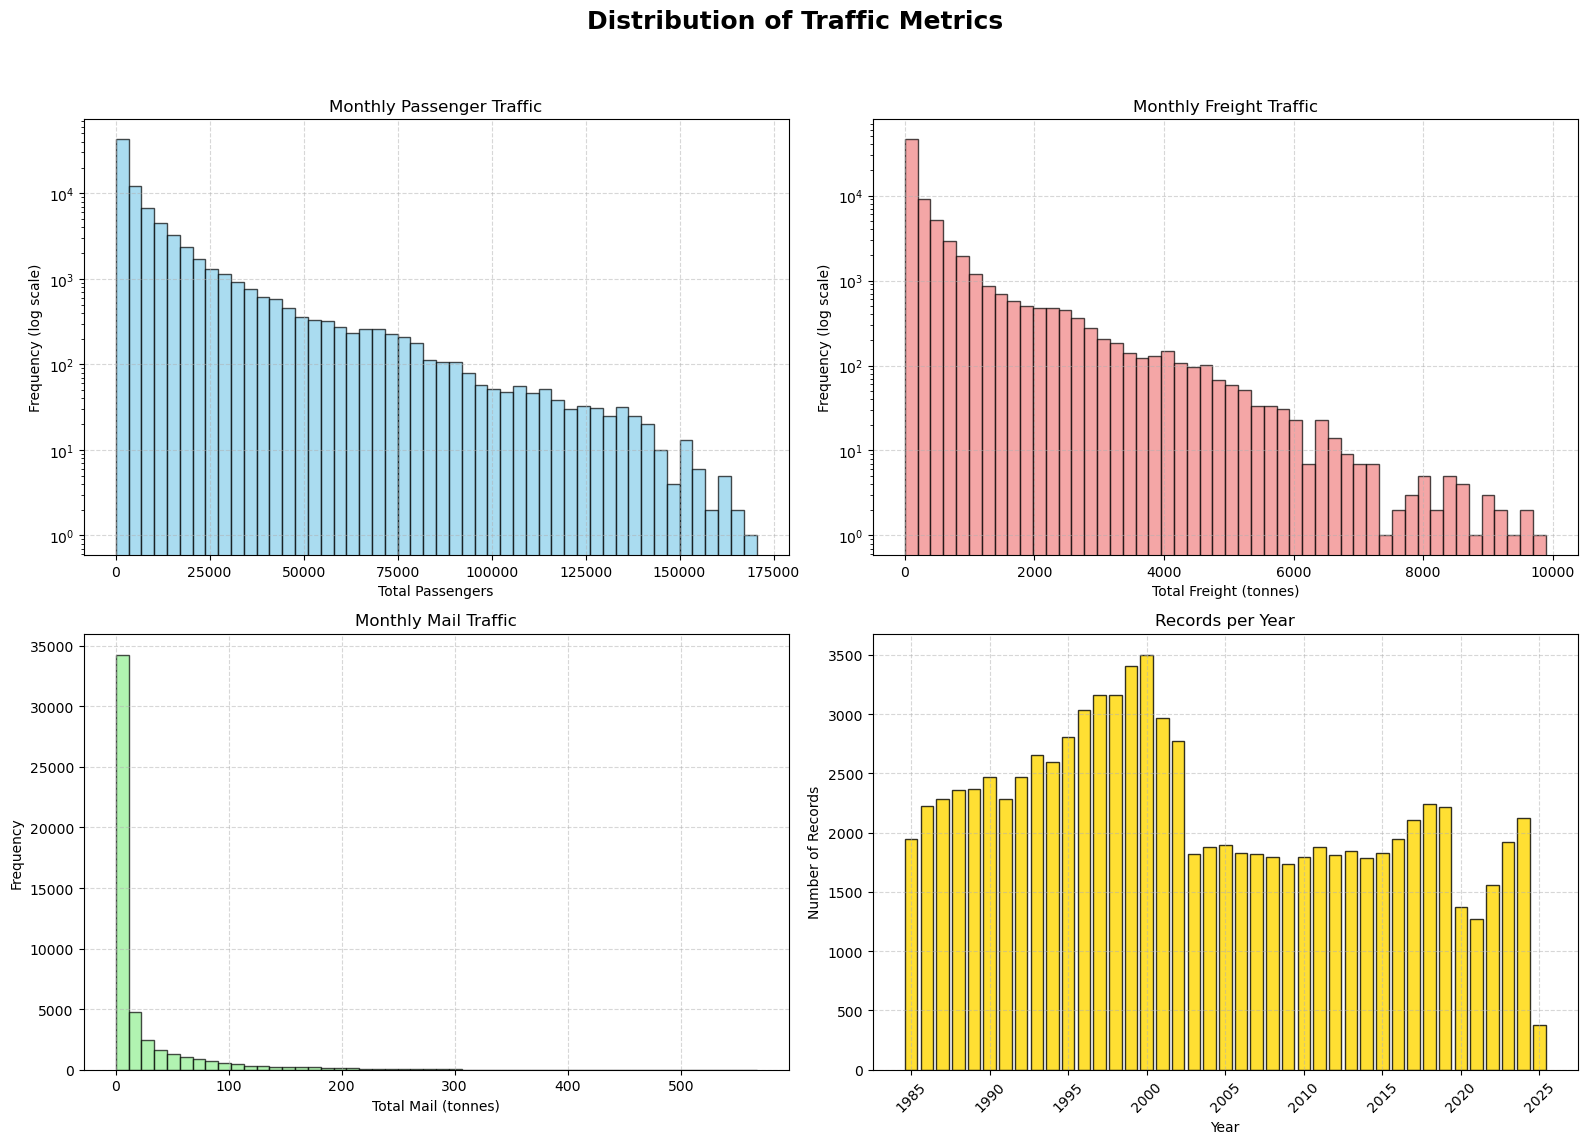

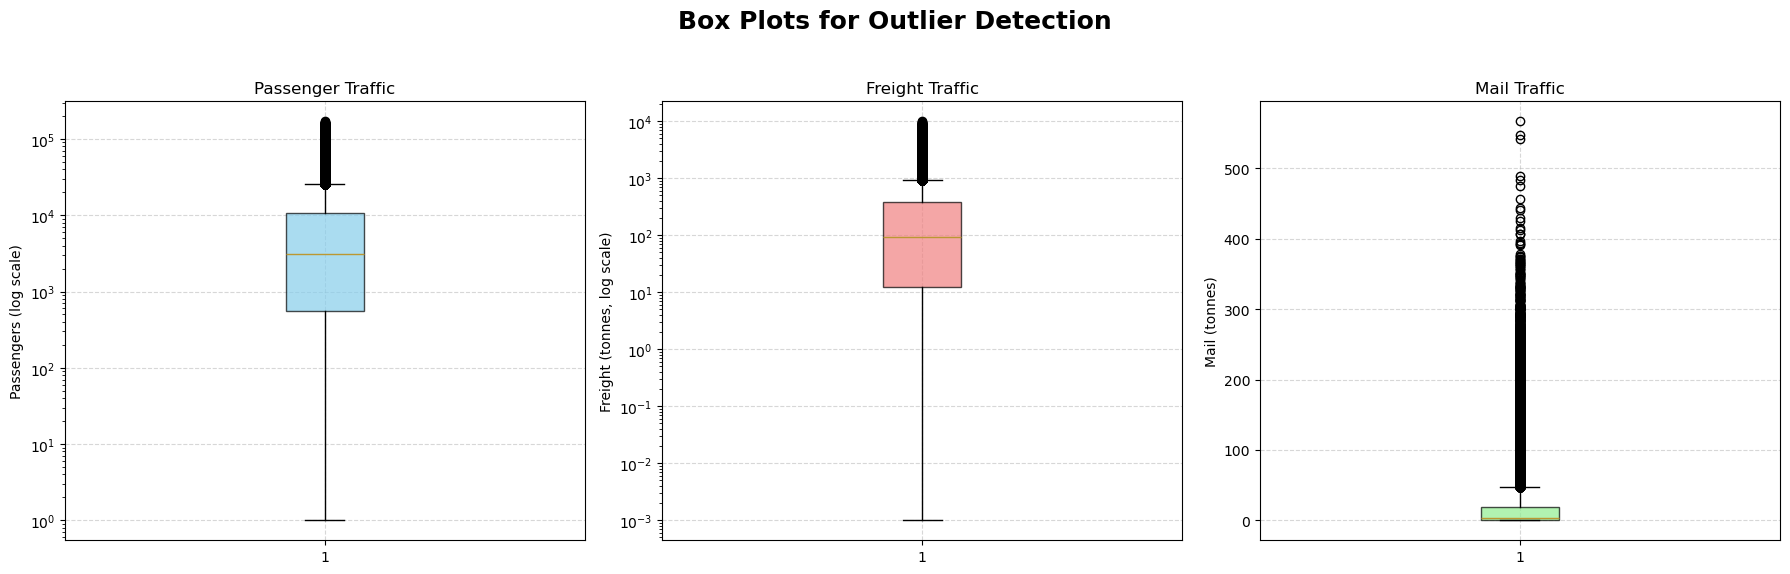

In [399]:
# --- Distribution Plots for Key Metrics ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Traffic Metrics', fontsize=18, fontweight='bold')

# Passenger Distribution
axes[0, 0].hist(df_clean[df_clean['Passengers_Total'] > 0]['Passengers_Total'],
               bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Monthly Passenger Traffic')
axes[0, 0].set_xlabel('Total Passengers')
axes[0, 0].set_ylabel('Frequency (log scale)')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# Freight Distribution
axes[0, 1].hist(df_clean[df_clean['Freight_Total_(tonnes)'] > 0]['Freight_Total_(tonnes)'],
               bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Monthly Freight Traffic')
axes[0, 1].set_xlabel('Total Freight (tonnes)')
axes[0, 1].set_ylabel('Frequency (log scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# Mail Distribution
axes[1, 0].hist(df_clean[df_clean['Mail_Total_(tonnes)'] > 0]['Mail_Total_(tonnes)'],
               bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Monthly Mail Traffic')
axes[1, 0].set_xlabel('Total Mail (tonnes)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# Yearly Record Count
year_counts = df_clean['Year'].value_counts().sort_index()
axes[1, 1].bar(year_counts.index, year_counts.values, 
               color='gold', edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Records per Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Records')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Box Plots for Outlier Detection ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots for Outlier Detection', fontsize=18, fontweight='bold')

# Passengers
axes[0].boxplot(df_clean[df_clean['Passengers_Total'] > 0]['Passengers_Total'], patch_artist=True,
                boxprops=dict(facecolor='skyblue', alpha=0.7))
axes[0].set_title('Passenger Traffic')
axes[0].set_ylabel('Passengers (log scale)')
axes[0].set_yscale('log')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Freight
axes[1].boxplot(df_clean[df_clean['Freight_Total_(tonnes)'] > 0]['Freight_Total_(tonnes)'], patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[1].set_title('Freight Traffic')
axes[1].set_ylabel('Freight (tonnes, log scale)')
axes[1].set_yscale('log')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Mail
axes[2].boxplot(df_clean[df_clean['Mail_Total_(tonnes)'] > 0]['Mail_Total_(tonnes)'], patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[2].set_title('Mail Traffic')
axes[2].set_ylabel('Mail (tonnes)')
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<h3>4. Traffic Volume Analysis by Routes</h3>

Analysing the busiest routes and city pairs to identify the most important aviation corridors for Australia's international traffic.

In [402]:
# --- Traffic Volume Analysis by Routes ---

# Top 20 Routes by Passenger Volume
route_passenger_totals = df_clean.groupby('Route')['Passengers_Total'].sum().sort_values(ascending=False)
top_20_routes_passengers = route_passenger_totals.head(20)

print("Top 20 Routes by Total Passenger Volume (1985-2025):")
print("=" * 60)
for i, (route, passengers) in enumerate(top_20_routes_passengers.items(), 1):
    print(f"{i:2d}. {route}: {passengers:,.0f} passengers")

# Top 20 Routes by Freight Volume
route_freight_totals = df_clean.groupby('Route')['Freight_Total_(tonnes)'].sum().sort_values(ascending=False)
top_20_routes_freight = route_freight_totals.head(20)

print(f"\nTop 20 Routes by Total Freight Volume (1985-2025):")
print("=" * 60)
for i, (route, freight) in enumerate(top_20_routes_freight.items(), 1):
    print(f"{i:2d}. {route}: {freight:,.0f} tonnes")


Top 20 Routes by Total Passenger Volume (1985-2025):
 1. Sydney - Auckland: 40,969,873 passengers
 2. Sydney - Singapore: 35,183,831 passengers
 3. Melbourne - Singapore: 29,260,667 passengers
 4. Perth - Singapore: 27,149,006 passengers
 5. Sydney - Hong Kong: 25,100,903 passengers
 6. Sydney - Los Angeles: 24,519,331 passengers
 7. Melbourne - Auckland: 24,070,445 passengers
 8. Brisbane - Auckland: 22,435,271 passengers
 9. Brisbane - Singapore: 19,259,891 passengers
10. Sydney - Tokyo: 16,139,982 passengers
11. Perth - Denpasar: 15,179,238 passengers
12. Sydney - Bangkok: 15,131,478 passengers
13. Sydney - Christchurch: 14,319,298 passengers
14. Melbourne - Hong Kong: 14,226,429 passengers
15. Melbourne - Kuala Lumpur: 13,830,213 passengers
16. Sydney - Kuala Lumpur: 12,458,018 passengers
17. Sydney - London: 11,259,879 passengers
18. Sydney - Dubai: 11,183,611 passengers
19. Sydney - Nadi: 11,134,605 passengers
20. Perth - Kuala Lumpur: 10,649,529 passengers

Top 20 Routes by Tota

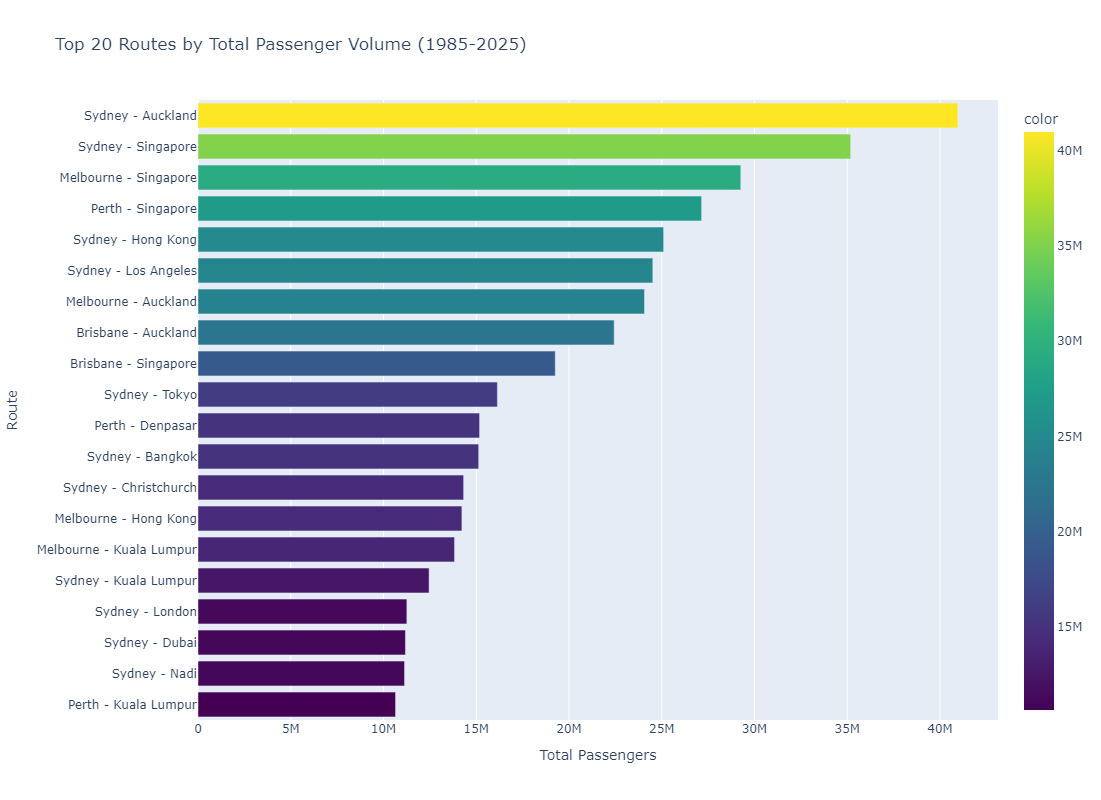

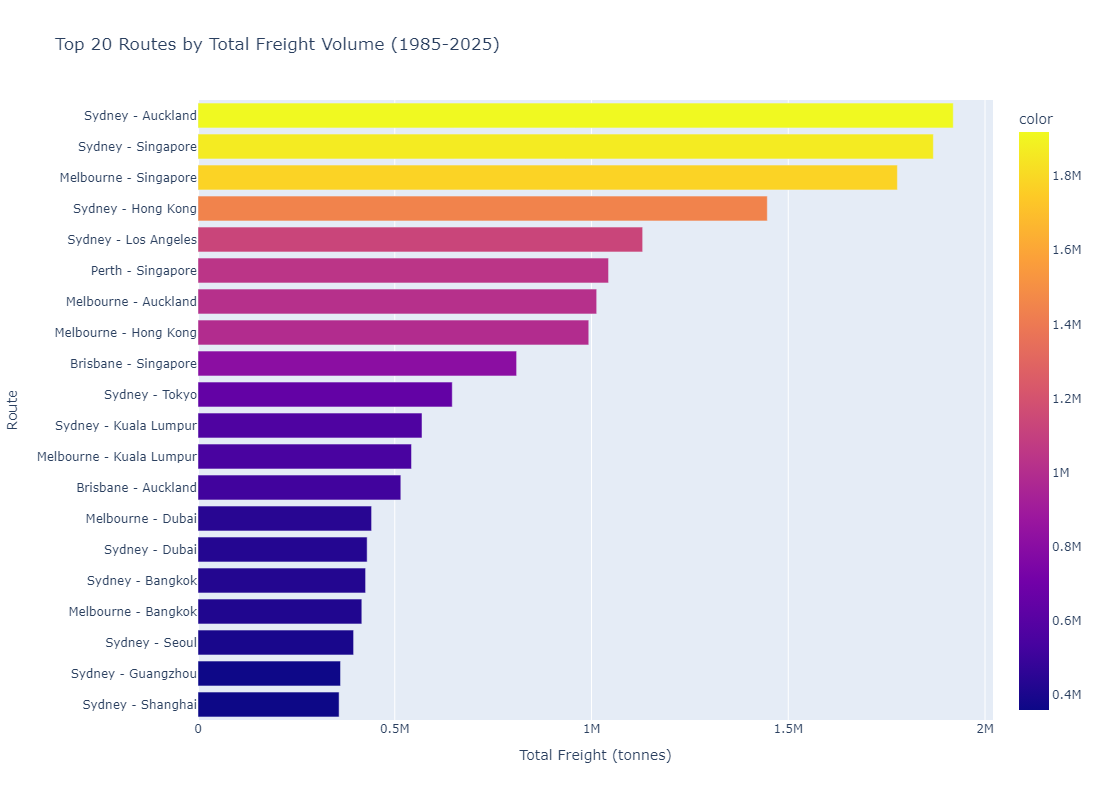

In [403]:
# --- Interactive Bar Chart: Top Passenger Routes ---
fig_passengers = px.bar(
    x=top_20_routes_passengers.values,
    y=top_20_routes_passengers.index,
    orientation='h',
    title='Top 20 Routes by Total Passenger Volume (1985-2025)',
    labels={'x': 'Total Passengers', 'y': 'Route'},
    color=top_20_routes_passengers.values,
    color_continuous_scale='Viridis'
)
fig_passengers.update_layout(
    height=800,
    showlegend=False,
    yaxis={'categoryorder': 'total ascending'}
)
fig_passengers.show()

# --- Interactive Bar Chart: Top Freight Routes ---
fig_freight = px.bar(
    x=top_20_routes_freight.values,
    y=top_20_routes_freight.index,
    orientation='h',
    title='Top 20 Routes by Total Freight Volume (1985-2025)',
    labels={'x': 'Total Freight (tonnes)', 'y': 'Route'},
    color=top_20_routes_freight.values,
    color_continuous_scale='Plasma'
)
fig_freight.update_layout(
    height=800,
    showlegend=False,
    yaxis={'categoryorder': 'total ascending'}
)
fig_freight.show()


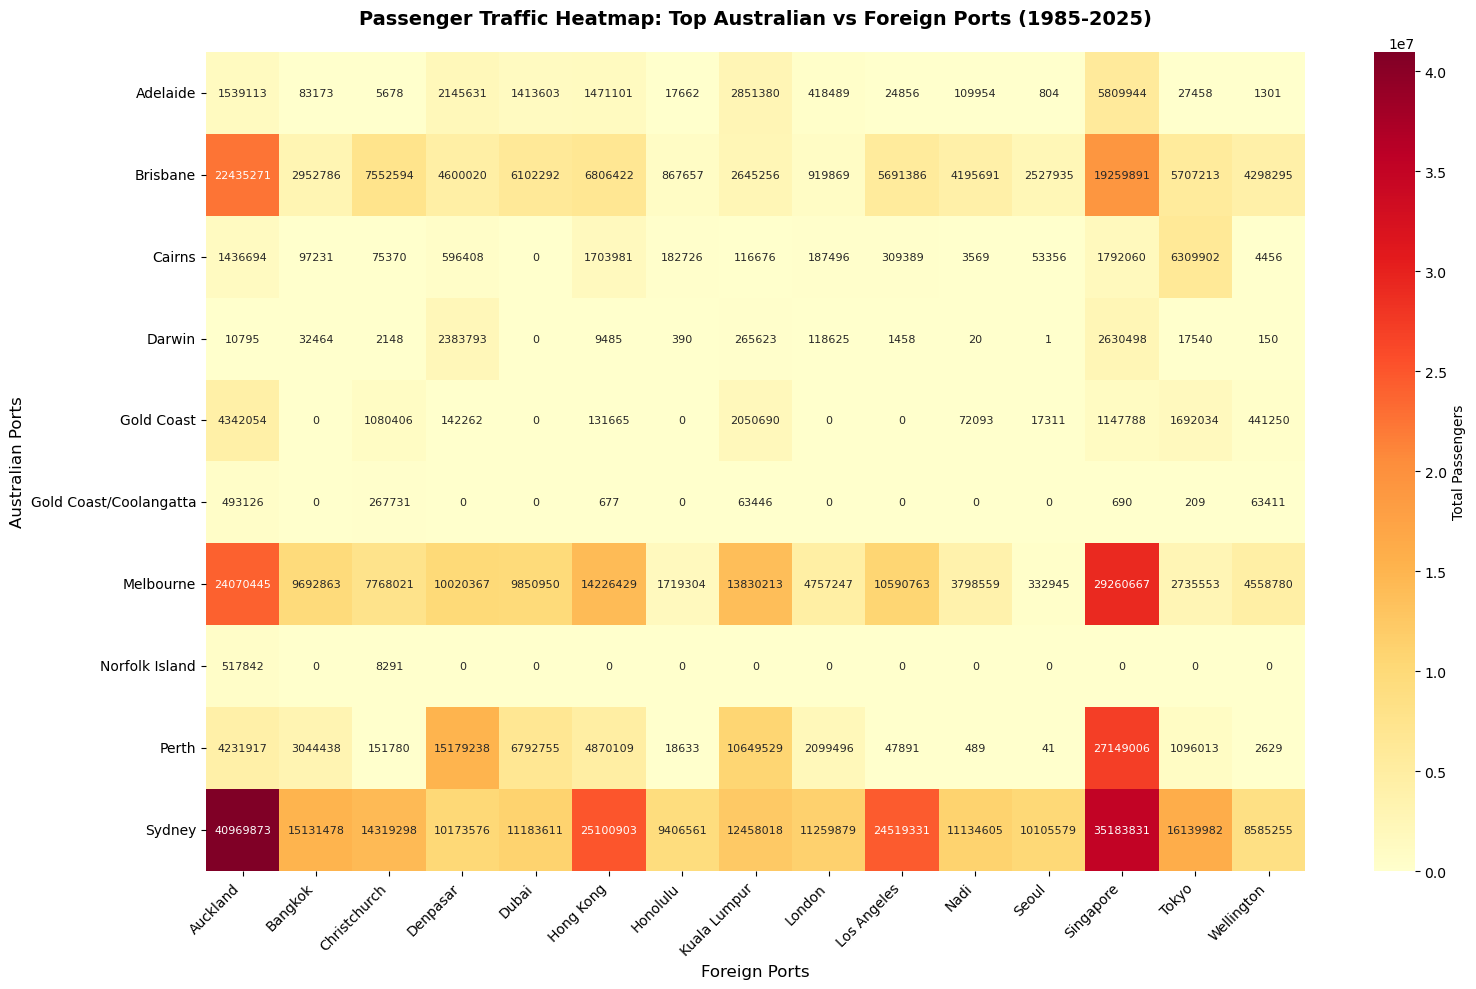

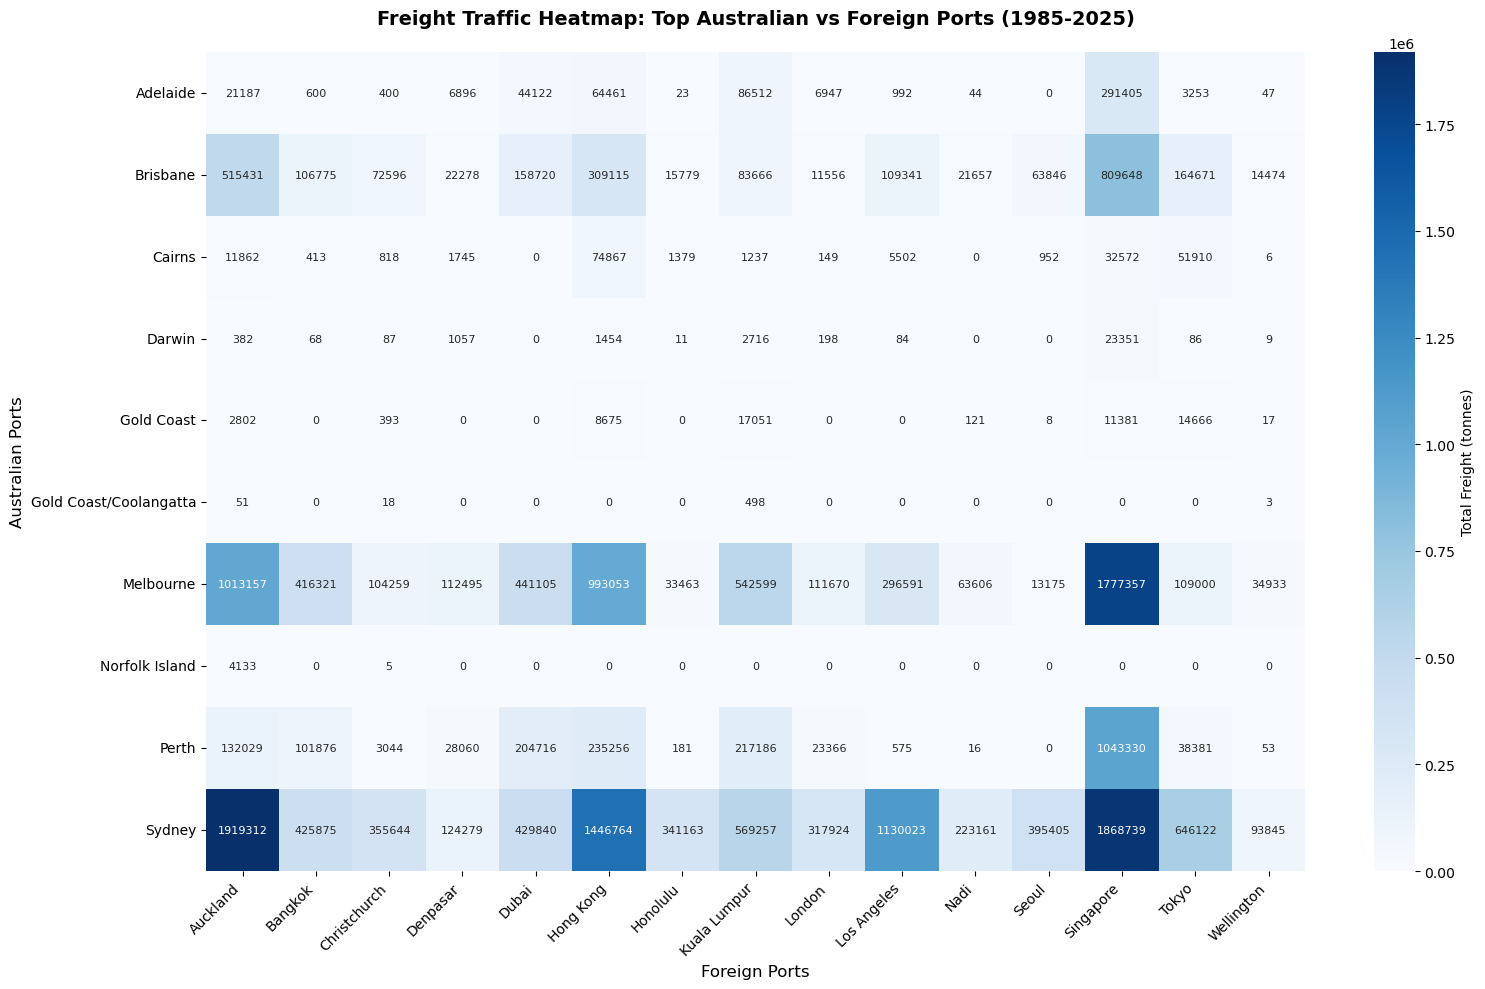

In [409]:
# --- Heatmap: Passenger Traffic Intensity Between Top Australian & Foreign Ports ---

# Select top ports for focused visualization
top_aus_ports = df_clean.groupby('AustralianPort')['Passengers_Total'].sum().nlargest(10).index
top_foreign_ports = df_clean.groupby('ForeignPort')['Passengers_Total'].sum().nlargest(15).index

# Prepare heatmap data for passengers
heatmap_data = df_clean[
    (df_clean['AustralianPort'].isin(top_aus_ports)) & 
    (df_clean['ForeignPort'].isin(top_foreign_ports))
].groupby(['AustralianPort', 'ForeignPort'])['Passengers_Total'].sum().unstack(fill_value=0)

# Plot passenger traffic heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Total Passengers'},
    annot_kws={'size': 8}
)
plt.title('Passenger Traffic Heatmap: Top Australian vs Foreign Ports (1985-2025)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Foreign Ports', fontsize=12)
plt.ylabel('Australian Ports', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# --- Heatmap: Freight Traffic Intensity Between Top Australian & Foreign Ports ---

# Prepare heatmap data for freight
heatmap_data_freight = df_clean[
    (df_clean['AustralianPort'].isin(top_aus_ports)) & 
    (df_clean['ForeignPort'].isin(top_foreign_ports))
].groupby(['AustralianPort', 'ForeignPort'])['Freight_Total_(tonnes)'].sum().unstack(fill_value=0)

# Plot freight traffic heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data_freight,
    annot=True,
    fmt='.0f',
    cmap='Blues',
    cbar_kws={'label': 'Total Freight (tonnes)'},
    annot_kws={'size': 8}
)
plt.title('Freight Traffic Heatmap: Top Australian vs Foreign Ports (1985-2025)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Foreign Ports', fontsize=12)
plt.ylabel('Australian Ports', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<h3>5. Geographic Distribution Analysis</h3>

Analysing how aviation traffic is distributed across AU and international ports/destinations to understand the geographic patterns of Australia's international connectivity.

In [419]:
# Analyse traffic distribution by Australian ports
aus_port_traffic = df_clean.groupby('AustralianPort').agg({
    'Passengers_Total': 'sum',
    'Freight_Total_(tonnes)': 'sum',
    'Mail_Total_(tonnes)': 'sum'
}).sort_values('Passengers_Total', ascending=False)

# Analyze traffic distribution by countries
country_traffic = df_clean.groupby('Country').agg({
    'Passengers_Total': 'sum',
    'Freight_Total_(tonnes)': 'sum',
    'Mail_Total_(tonnes)': 'sum'
}).sort_values('Passengers_Total', ascending=False)

print("Top 10 Australian Ports by Passenger Volume:")
print("="*50)
for i, (port, row) in enumerate(aus_port_traffic.head(10).iterrows(), 1):
    print(f"{i:2d}. {port}: {row['Passengers_Total']:,.0f} passengers")

print(f"\nTop 10 Countries by Passenger Volume:")
print("="*50)
for i, (country, row) in enumerate(country_traffic.head(10).iterrows(), 1):
    print(f"{i:2d}. {country}: {row['Passengers_Total']:,.0f} passengers")

Top 10 Australian Ports by Passenger Volume:
 1. Sydney: 353,767,119 passengers
 2. Melbourne: 185,703,821 passengers
 3. Brisbane: 122,398,330 passengers
 4. Perth: 87,102,085 passengers
 5. Cairns: 20,778,500 passengers
 6. Adelaide: 17,331,237 passengers
 7. Gold Coast: 12,156,505 passengers
 8. Darwin: 6,407,916 passengers
 9. Gold Coast/Coolangatta: 1,255,075 passengers
10. Norfolk Island: 526,133 passengers

Top 10 Countries by Passenger Volume:
 1. New Zealand: 160,126,935 passengers
 2. Singapore: 122,491,551 passengers
 3. USA: 66,215,009 passengers
 4. Indonesia: 53,211,663 passengers
 5. United Arab Emirates: 46,573,826 passengers
 6. Japan: 46,294,710 passengers
 7. Malaysia: 45,196,437 passengers
 8. Thailand: 34,459,940 passengers
 9. China: 32,899,205 passengers
10. Hong Kong (SAR): 32,275,109 passengers


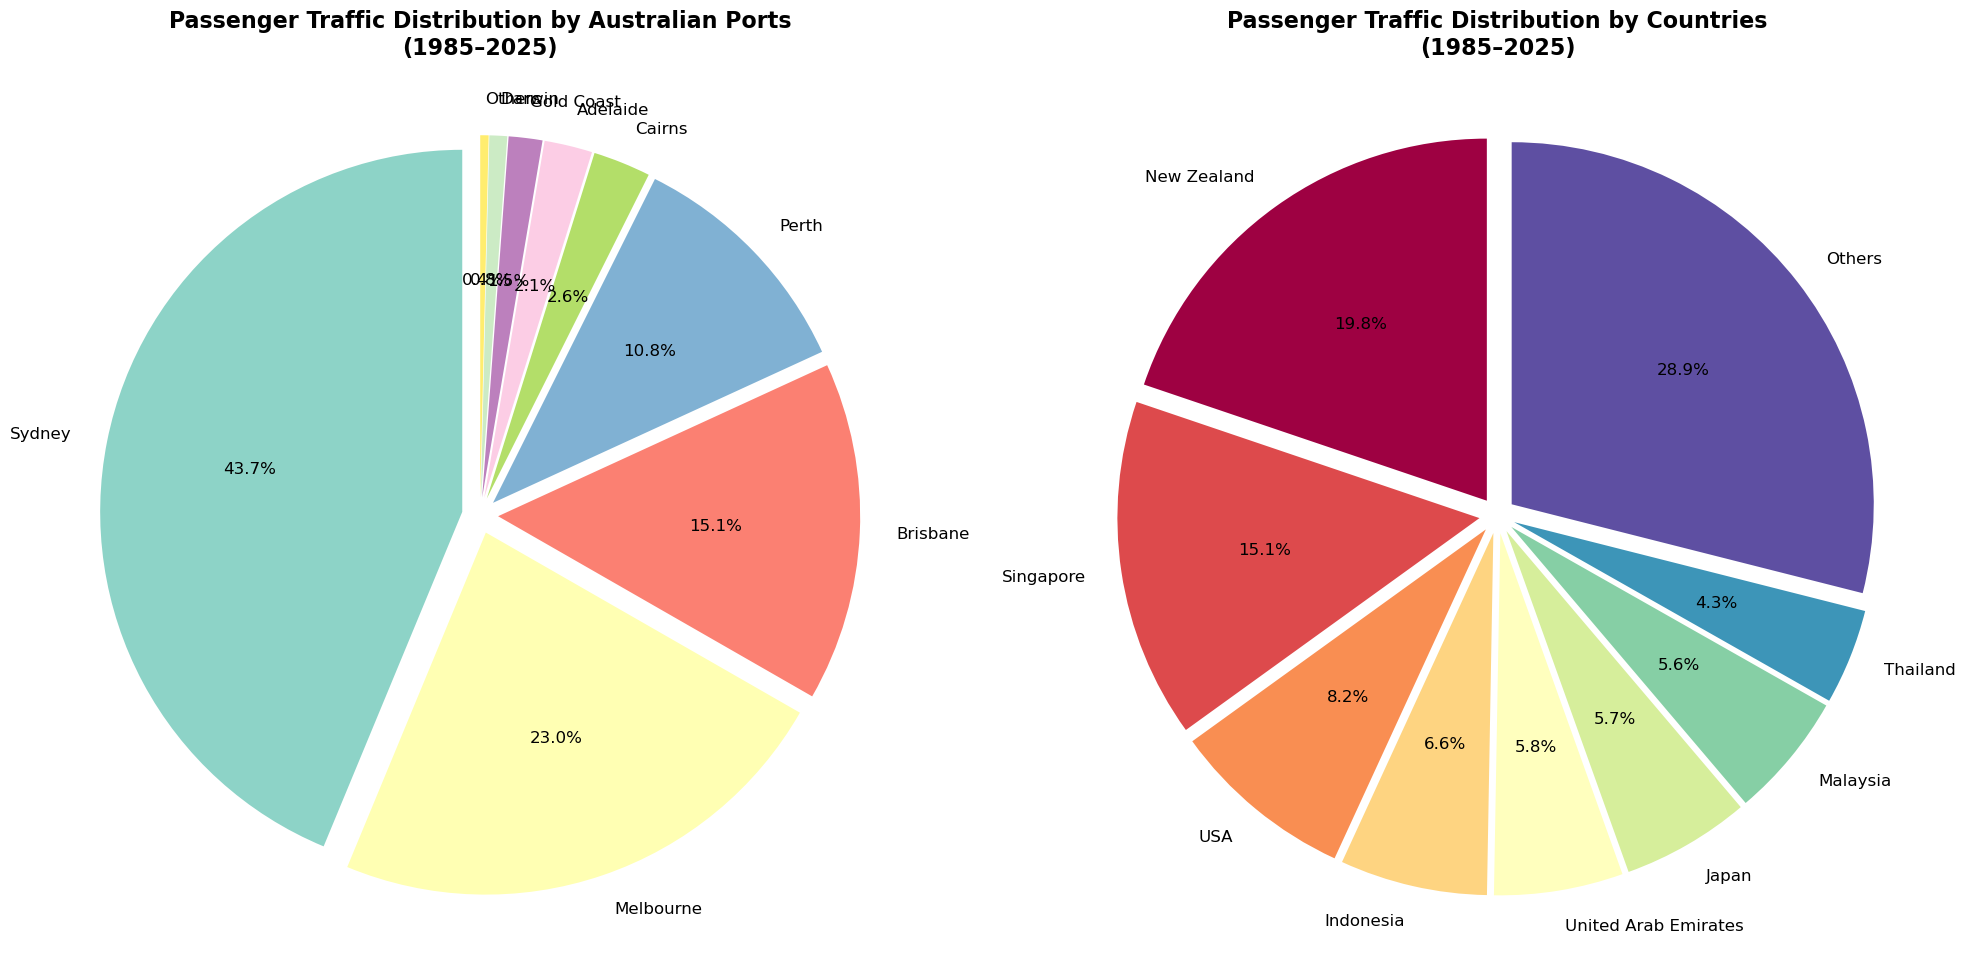

In [421]:
# Create pie charts for top ports and countries
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# ----------------------
# Australian ports pie chart (top 8 + others)
# ----------------------
top_ports = aus_port_traffic.head(8)
other_ports_total = aus_port_traffic.iloc[8:]['Passengers_Total'].sum()

port_data = list(top_ports['Passengers_Total'])
port_labels = list(top_ports.index)

# Add "Others" if necessary
if other_ports_total > 0:
    port_data.append(other_ports_total)
    port_labels.append("Others")

colors_ports = plt.cm.Set3(np.linspace(0, 1, len(port_labels)))
explode_ports = [0.05] * len(port_labels)  # Slight explode for all

wedges, texts, autotexts = axes[0].pie(
    port_data,
    labels=port_labels,
    autopct='%1.1f%%',
    explode=explode_ports,
    colors=colors_ports,
    startangle=90,
    textprops={'fontsize': 12}
)
axes[0].set_title('Passenger Traffic Distribution by Australian Ports\n(1985–2025)', 
                  fontsize=16, fontweight='bold')

# ----------------------
# Countries pie chart (top 8 + others)
# ----------------------
top_countries = country_traffic.head(8)
other_countries_total = country_traffic.iloc[8:]['Passengers_Total'].sum()

country_data = list(top_countries['Passengers_Total'])
country_labels = list(top_countries.index)

if other_countries_total > 0:
    country_data.append(other_countries_total)
    country_labels.append("Others")

colors_countries = plt.cm.Spectral(np.linspace(0, 1, len(country_labels)))
explode_countries = [0.05] * len(country_labels)

wedges2, texts2, autotexts2 = axes[1].pie(
    country_data,
    labels=country_labels,
    autopct='%1.1f%%',
    explode=explode_countries,
    colors=colors_countries,
    startangle=90,
    textprops={'fontsize': 12}
)
axes[1].set_title('Passenger Traffic Distribution by Countries\n(1985–2025)', 
                  fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


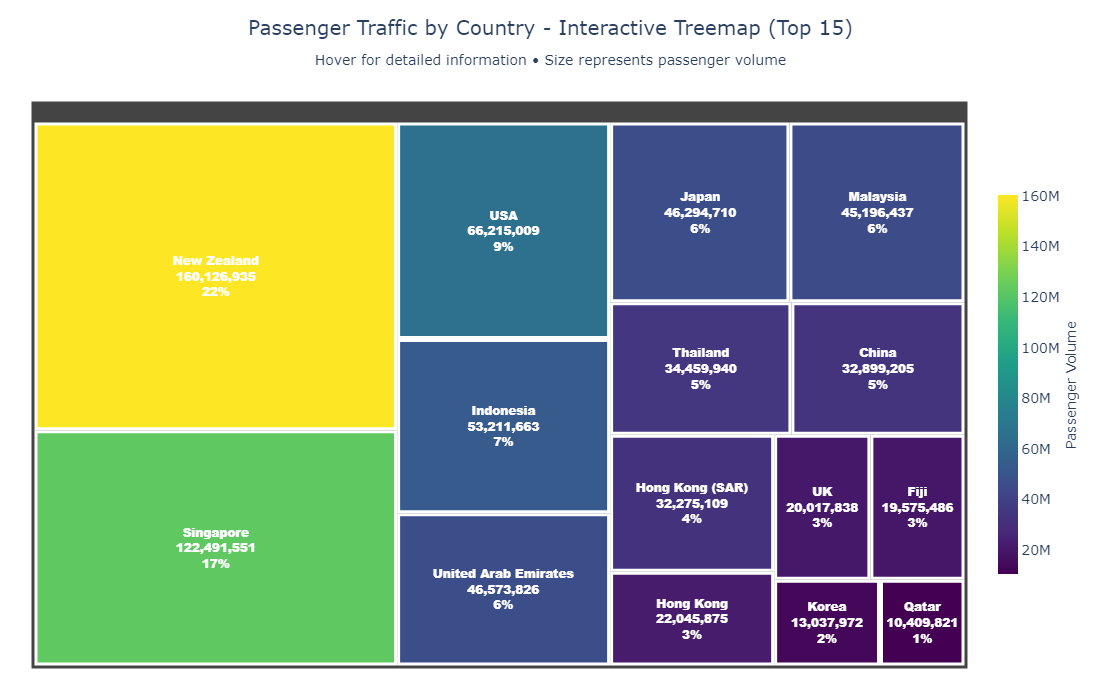

In [423]:
# INTERACTIVE TREEMAP VISUALISATION
# Get top 15 countries for treemap
top_15_countries = country_traffic.head(15).reset_index()

# Create the enhanced treemap
try:
    fig_treemap = px.treemap(
        top_15_countries,
        path=['Country'],
        values='Passengers_Total',
        title='Passenger Traffic by Country - Interactive Treemap (Top 15)<br><sub>Hover for detailed information • Size represents passenger volume</sub>',
        color='Passengers_Total',
        color_continuous_scale='Viridis',
        hover_data={'Passengers_Total': ':,.0f'}
    )

    fig_treemap.update_layout(
        height=700,
        width=1200,
        font_size=14,
        title_font_size=20,
        title_x=0.5,
        title_y=0.95,
        margin=dict(t=100, l=30, r=30, b=30),
        paper_bgcolor='white',
        plot_bgcolor='white',
        coloraxis_colorbar=dict(
            title="Passenger Volume",
            title_side="right",
            title_font_size=14,
            tickformat=".2s",
            len=0.7,
            thickness=20
        )
    )

    fig_treemap.update_traces(
        textinfo="label+value+percent parent",
        textposition="middle center",
        textfont_size=12,
        textfont_color="white",
        textfont_family="Arial Black",
        hovertemplate="<b>%{label}</b><br>" +
                      "Total Passengers: %{value:,.0f}<br>" +
                      "Percentage of Top 15: %{percentParent}<br>" +
                      "<extra></extra>",
        marker_line_width=3,
        marker_line_color="white",
        marker_colorscale='Viridis'
    )

    fig_treemap.show()

except Exception as e:
    print(f"Error creating treemap: {str(e)}")
    print("Creating alternative visualization...")
    
    fig_fallback = px.bar(
        top_15_countries,
        x='Passengers_Total',
        y='Country',
        orientation='h',
        title='Passenger Traffic by Country (Top 15) - Alternative View',
        color='Passengers_Total',
        color_continuous_scale='Viridis',
        text='Passengers_Total'
    )
    
    fig_fallback.update_layout(
        height=600,
        width=1000,
        yaxis={'categoryorder': 'total ascending'}
    )
    
    fig_fallback.update_traces(
        texttemplate='%{text:,.0f}',
        textposition='outside'
    )
    
    fig_fallback.show()




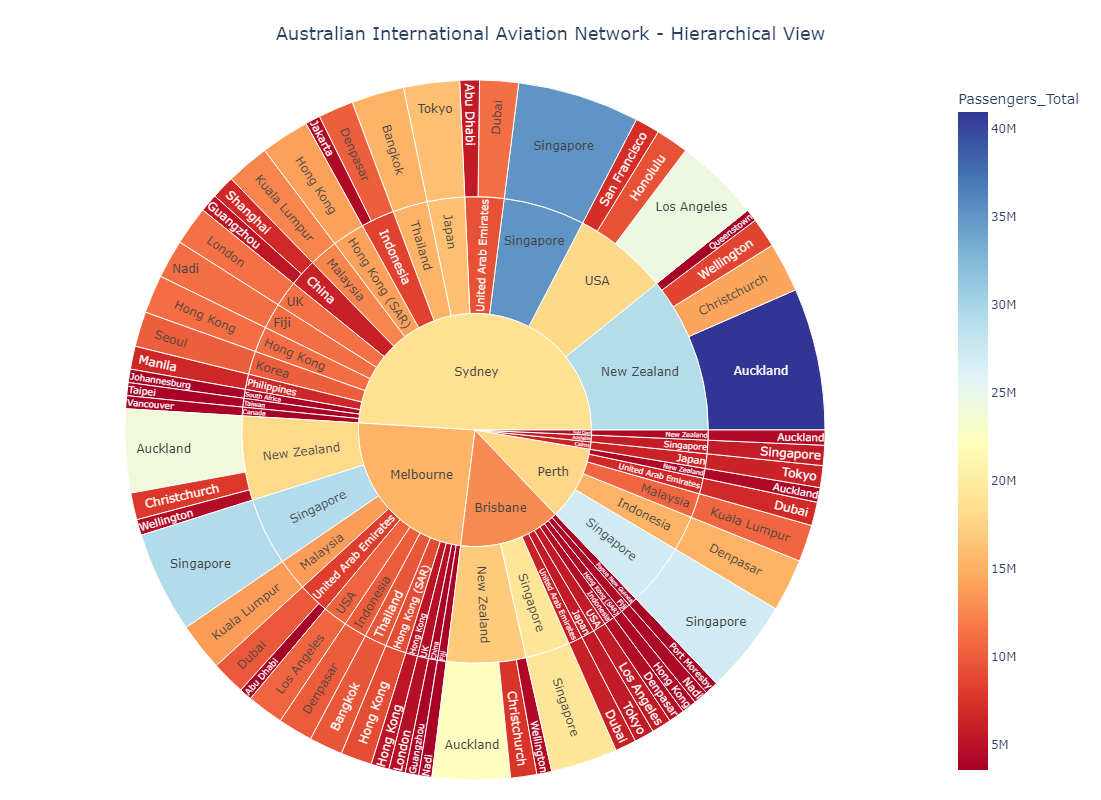

In [425]:
# Sunburst Chart
sunburst_data = df_clean.groupby(['AustralianPort', 'Country', 'ForeignPort'])['Passengers_Total'].sum().reset_index()
sunburst_data = sunburst_data.sort_values('Passengers_Total', ascending=False).head(60)

fig_sunburst = px.sunburst(
    sunburst_data,
    path=['AustralianPort', 'Country', 'ForeignPort'],
    values='Passengers_Total',
    title='Australian International Aviation Network - Hierarchical View',
    color='Passengers_Total',
    color_continuous_scale='RdYlBu',
    hover_data={'Passengers_Total': ':,.0f'}
)

fig_sunburst.update_layout(
    height=800,
    width=1000,
    font_size=12,
    title_font_size=18,
    title_x=0.5,
    margin=dict(t=80, l=20, r=20, b=20)
)

fig_sunburst.update_traces(
    hovertemplate="<b>%{label}</b><br>" +
                  "Passengers: %{value:,.0f}<br>" +
                  "Percentage: %{percentParent}<br>" +
                  "<extra></extra>"
)

fig_sunburst.show()


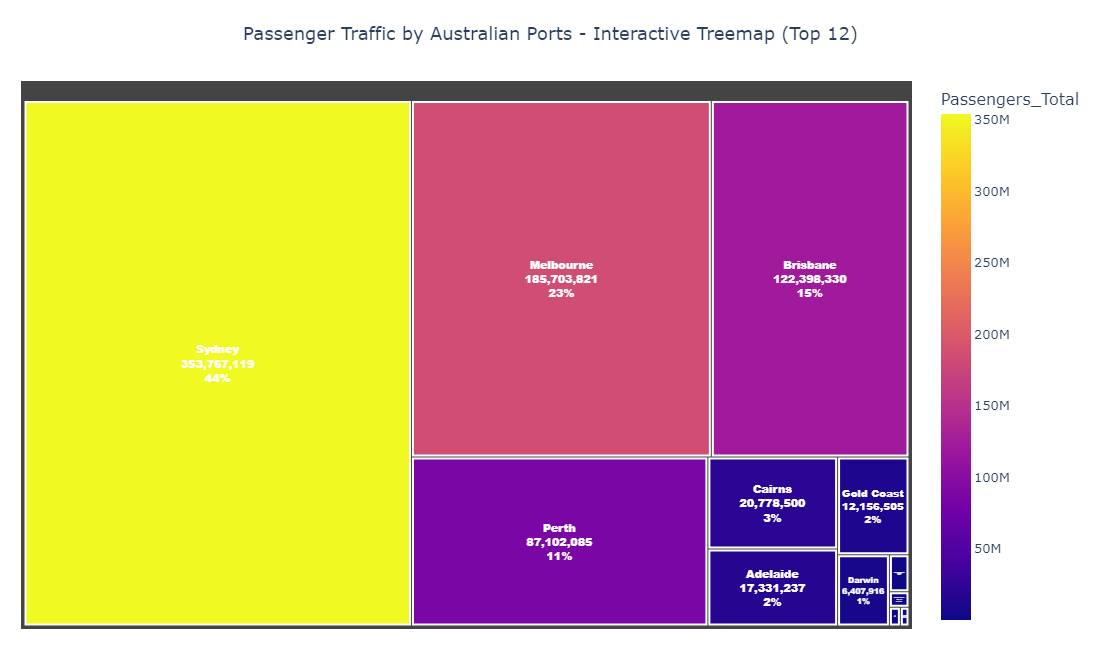

In [427]:
# Australian Ports Treemap
top_12_ports = aus_port_traffic.head(12).reset_index()

fig_ports_treemap = px.treemap(
    top_12_ports,
    path=['AustralianPort'],
    values='Passengers_Total',
    title='Passenger Traffic by Australian Ports - Interactive Treemap (Top 12)',
    color='Passengers_Total',
    color_continuous_scale='Plasma',
    hover_data={'Passengers_Total': ':,.0f'}
)

fig_ports_treemap.update_layout(
    height=650,
    width=1000,
    font_size=13,
    title_font_size=18,
    title_x=0.5,
    margin=dict(t=80, l=20, r=20, b=20)
)

fig_ports_treemap.update_traces(
    textinfo="label+value+percent parent",
    textposition="middle center",
    textfont_size=11,
    textfont_color="white",
    textfont_family="Arial Black",
    hovertemplate="<b>%{label}</b><br>" +
                  "Passengers: %{value:,.0f}<br>" +
                  "Percentage: %{percentParent}<br>" +
                  "<extra></extra>",
    marker_line_width=2,
    marker_line_color="white"
)

fig_ports_treemap.show()

<h3>6. Freight Vs. Passenger Traffic Analysis</h3>

In [437]:
# Calculate freight-to-passenger ratios for route analysis
route_comparison = df_clean.groupby('Route').agg({
    'Passengers_Total': 'sum',
    'Freight_Total_(tonnes)': 'sum',
    'Mail_Total_(tonnes)': 'sum'
}).reset_index()

# Calculate ratios (freight tonnes per 1000 passengers)
route_comparison['Freight_per_1000_Passengers'] = (route_comparison['Freight_Total_(tonnes)'] / 
                                                  route_comparison['Passengers_Total'] * 1000)
route_comparison['Mail_per_1000_Passengers'] = (route_comparison['Mail_Total_(tonnes)'] / 
                                               route_comparison['Passengers_Total'] * 1000)

# Replace inf values with NaN for routes with no passengers
route_comparison = route_comparison.replace([np.inf, -np.inf], np.nan)

# Filter out routes with very low passenger volumes for meaningful analysis
significant_routes = route_comparison[route_comparison['Passengers_Total'] >= 10000].copy()

# Identify freight-focused vs passenger-focused routes
freight_focused = significant_routes.nlargest(15, 'Freight_per_1000_Passengers')
passenger_focused = significant_routes.nsmallest(15, 'Freight_per_1000_Passengers')

print("Top 15 Freight-Focused Routes (High Freight-to-Passenger Ratio):")
print("="*70)
for i, row in freight_focused.iterrows():
    print(f"{row['Route']}: {row['Freight_per_1000_Passengers']:.1f} tonnes per 1000 passengers")

print(f"\nTop 15 Passenger-Focused Routes (Low Freight-to-Passenger Ratio):")
print("="*70)
for i, row in passenger_focused.iterrows():
    print(f"{row['Route']}: {row['Freight_per_1000_Passengers']:.1f} tonnes per 1000 passengers")

Top 15 Freight-Focused Routes (High Freight-to-Passenger Ratio):
Melbourne - Chicago: 1684.3 tonnes per 1000 passengers
Sydney - Chicago: 831.6 tonnes per 1000 passengers
Melbourne - New York: 478.5 tonnes per 1000 passengers
Melbourne - Frankfurt: 205.2 tonnes per 1000 passengers
Sydney - Shenzhen: 185.5 tonnes per 1000 passengers
Sydney - Amsterdam: 167.1 tonnes per 1000 passengers
Melbourne - Nagoya: 136.2 tonnes per 1000 passengers
Adelaide - Tokyo: 118.5 tonnes per 1000 passengers
Sydney - Chongqing: 117.3 tonnes per 1000 passengers
Sydney - New York: 107.2 tonnes per 1000 passengers
Melbourne - Shenzhen: 98.2 tonnes per 1000 passengers
Sydney - Muscat: 95.9 tonnes per 1000 passengers
Melbourne - Bahrain: 85.1 tonnes per 1000 passengers
Melbourne - Taipei: 78.3 tonnes per 1000 passengers
Melbourne - Hong Kong: 69.8 tonnes per 1000 passengers

Top 15 Passenger-Focused Routes (Low Freight-to-Passenger Ratio):
Brisbane - Palmerston: 0.0 tonnes per 1000 passengers
Gold Coast - Denpasa

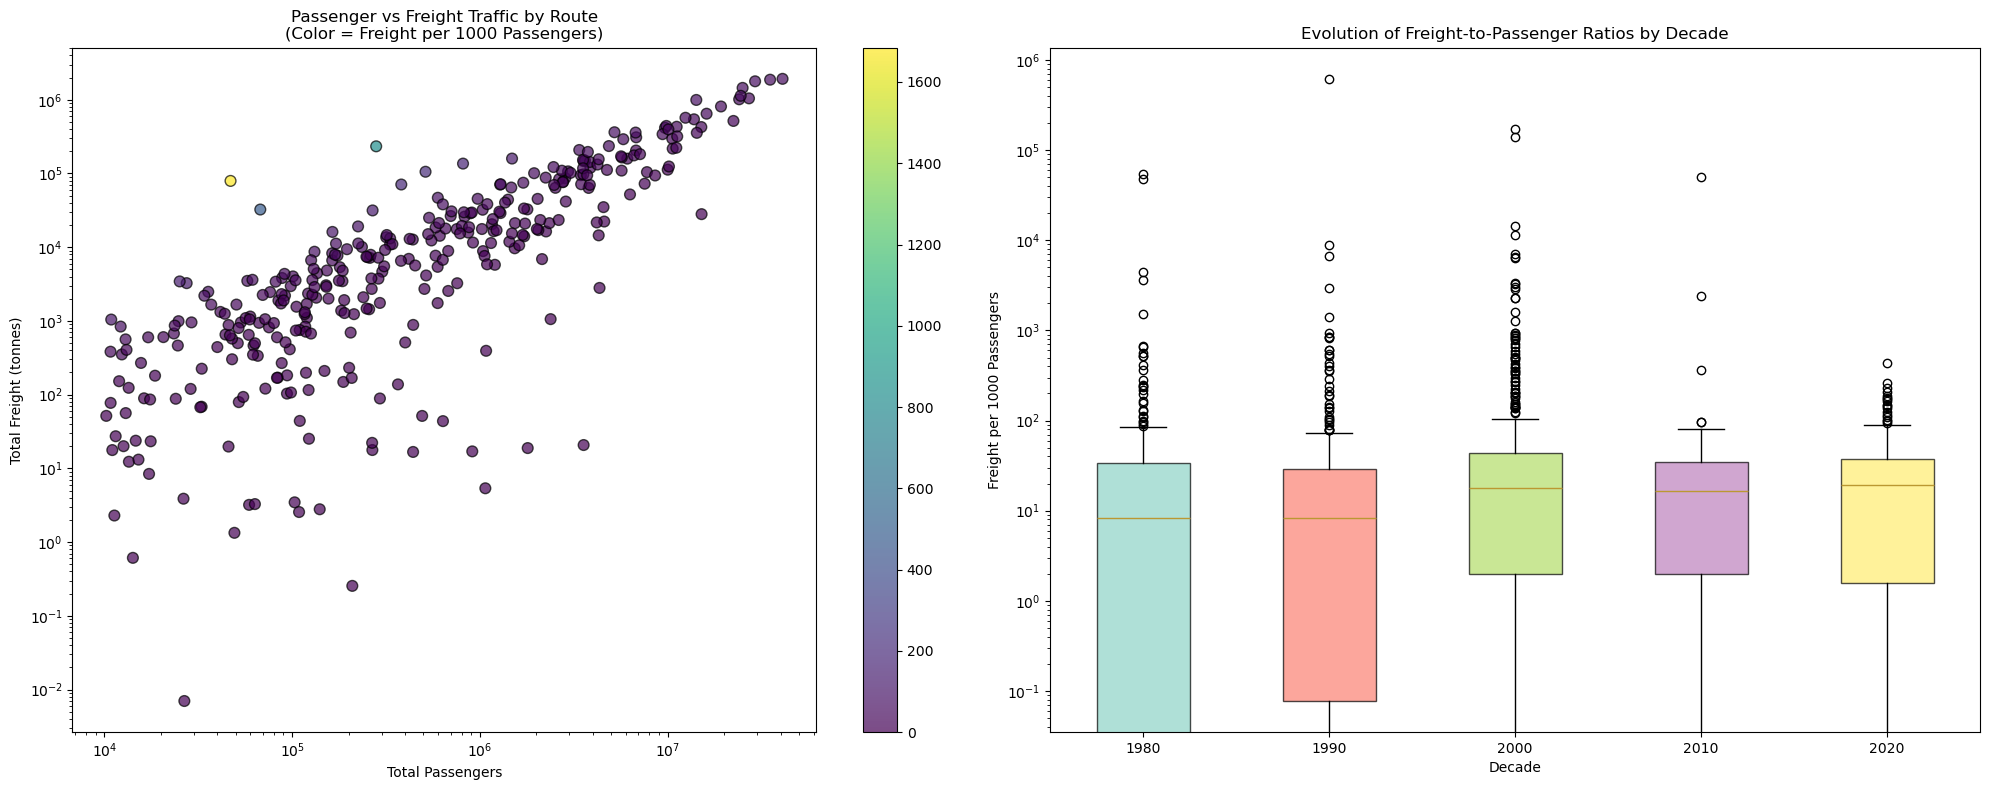

In [439]:
# Create scatter plot showing relationship between passenger and freight traffic
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Scatter plot with all routes
scatter = axes[0].scatter(significant_routes['Passengers_Total'], 
                         significant_routes['Freight_Total_(tonnes)'],
                         c=significant_routes['Freight_per_1000_Passengers'],
                         cmap='viridis', s=60, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Total Passengers')
axes[0].set_ylabel('Total Freight (tonnes)')
axes[0].set_title('Passenger vs Freight Traffic by Route\n(Color = Freight per 1000 Passengers)')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
plt.colorbar(scatter, ax=axes[0])

# Box plot comparing freight ratios by decade
decade_comparison = df_clean.groupby(['Decade', 'Route']).agg({
    'Passengers_Total': 'sum',
    'Freight_Total_(tonnes)': 'sum'
}).reset_index()

decade_comparison['Freight_per_1000_Passengers'] = (decade_comparison['Freight_Total_(tonnes)'] / 
                                                   decade_comparison['Passengers_Total'] * 1000)
decade_comparison = decade_comparison.replace([np.inf, -np.inf], np.nan).dropna()

decades = sorted(decade_comparison['Decade'].unique())
decade_data = [decade_comparison[decade_comparison['Decade'] == d]['Freight_per_1000_Passengers'].values 
               for d in decades]

box_plot = axes[1].boxplot(decade_data, labels=decades, patch_artist=True)
colors = plt.cm.Set3(np.linspace(0, 1, len(decades)))
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Freight per 1000 Passengers')
axes[1].set_title('Evolution of Freight-to-Passenger Ratios by Decade')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

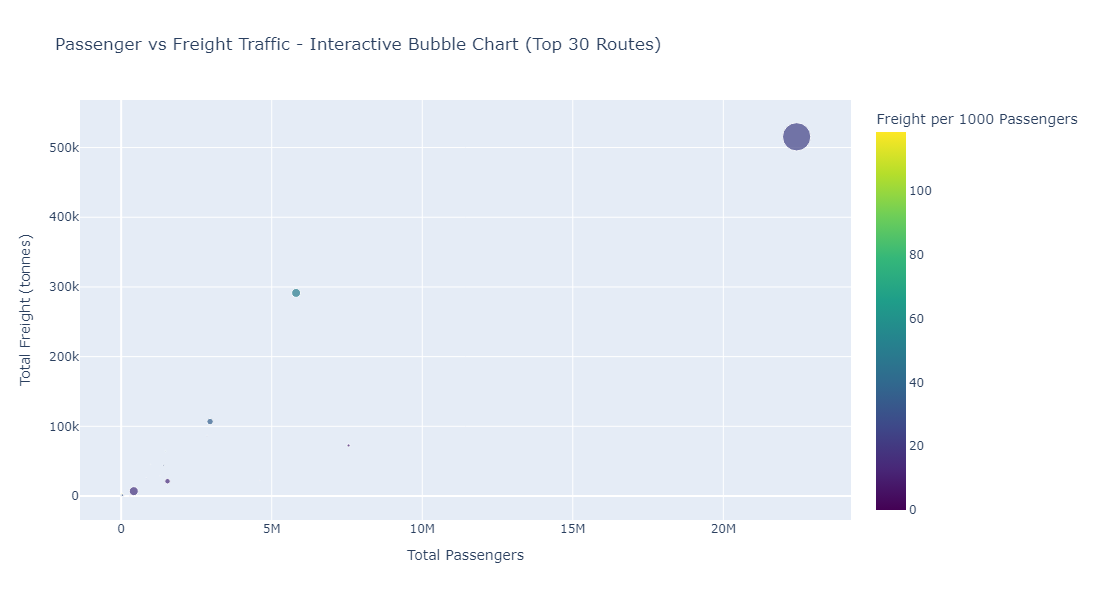


Correlation Analysis:
                        Passengers_Total  Freight_Total_(tonnes)  \
Passengers_Total                1.000000                0.933942   
Freight_Total_(tonnes)          0.933942                1.000000   
Mail_Total_(tonnes)             0.777386                0.772368   

                        Mail_Total_(tonnes)  
Passengers_Total                   0.777386  
Freight_Total_(tonnes)             0.772368  
Mail_Total_(tonnes)                1.000000  


In [440]:
# Create interactive bubble chart
fig_bubble = px.scatter(
    significant_routes.head(30),  # Top 30 routes by passenger volume
    x='Passengers_Total',
    y='Freight_Total_(tonnes)',
    size='Mail_Total_(tonnes)',
    color='Freight_per_1000_Passengers',
    hover_name='Route',
    title='Passenger vs Freight Traffic - Interactive Bubble Chart (Top 30 Routes)',
    labels={
        'Passengers_Total': 'Total Passengers',
        'Freight_Total_(tonnes)': 'Total Freight (tonnes)',
        'Freight_per_1000_Passengers': 'Freight per 1000 Passengers'
    },
    color_continuous_scale='Viridis'
)
fig_bubble.update_layout(height=600)
fig_bubble.show()

# Correlation analysis
correlation = significant_routes[['Passengers_Total', 'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)']].corr()
print(f"\nCorrelation Analysis:")
print("="*40)
print(correlation)

<h3>7. Top Performing Routes and Destinations</h3>

Analysing the most popular destinations from each major Australian port to find market dominance patterns.

In [445]:
# Analyse top destinations from each major Australian port
major_aus_ports = aus_port_traffic.head(6).index  # Top 6 Australian ports

port_destinations = {}
for port in major_aus_ports:
    port_data = df_clean[df_clean['AustralianPort'] == port]
    top_destinations = port_data.groupby('ForeignPort')['Passengers_Total'].sum().sort_values(ascending=False).head(10)
    port_destinations[port] = top_destinations

# Print top destinations for each port
for port, destinations in port_destinations.items():
    print(f"\nTop 10 Destinations from {port}:")
    print("="*50)
    for i, (dest, passengers) in enumerate(destinations.items(), 1):
        print(f"{i:2d}. {dest}: {passengers:,.0f} passengers")


Top 10 Destinations from Sydney:
 1. Auckland: 40,969,873 passengers
 2. Singapore: 35,183,831 passengers
 3. Hong Kong: 25,100,903 passengers
 4. Los Angeles: 24,519,331 passengers
 5. Tokyo: 16,139,982 passengers
 6. Bangkok: 15,131,478 passengers
 7. Christchurch: 14,319,298 passengers
 8. Kuala Lumpur: 12,458,018 passengers
 9. London: 11,259,879 passengers
10. Dubai: 11,183,611 passengers

Top 10 Destinations from Melbourne:
 1. Singapore: 29,260,667 passengers
 2. Auckland: 24,070,445 passengers
 3. Hong Kong: 14,226,429 passengers
 4. Kuala Lumpur: 13,830,213 passengers
 5. Los Angeles: 10,590,763 passengers
 6. Denpasar: 10,020,367 passengers
 7. Dubai: 9,850,950 passengers
 8. Bangkok: 9,692,863 passengers
 9. Christchurch: 7,768,021 passengers
10. London: 4,757,247 passengers

Top 10 Destinations from Brisbane:
 1. Auckland: 22,435,271 passengers
 2. Singapore: 19,259,891 passengers
 3. Christchurch: 7,552,594 passengers
 4. Hong Kong: 6,806,422 passengers
 5. Dubai: 6,102,2

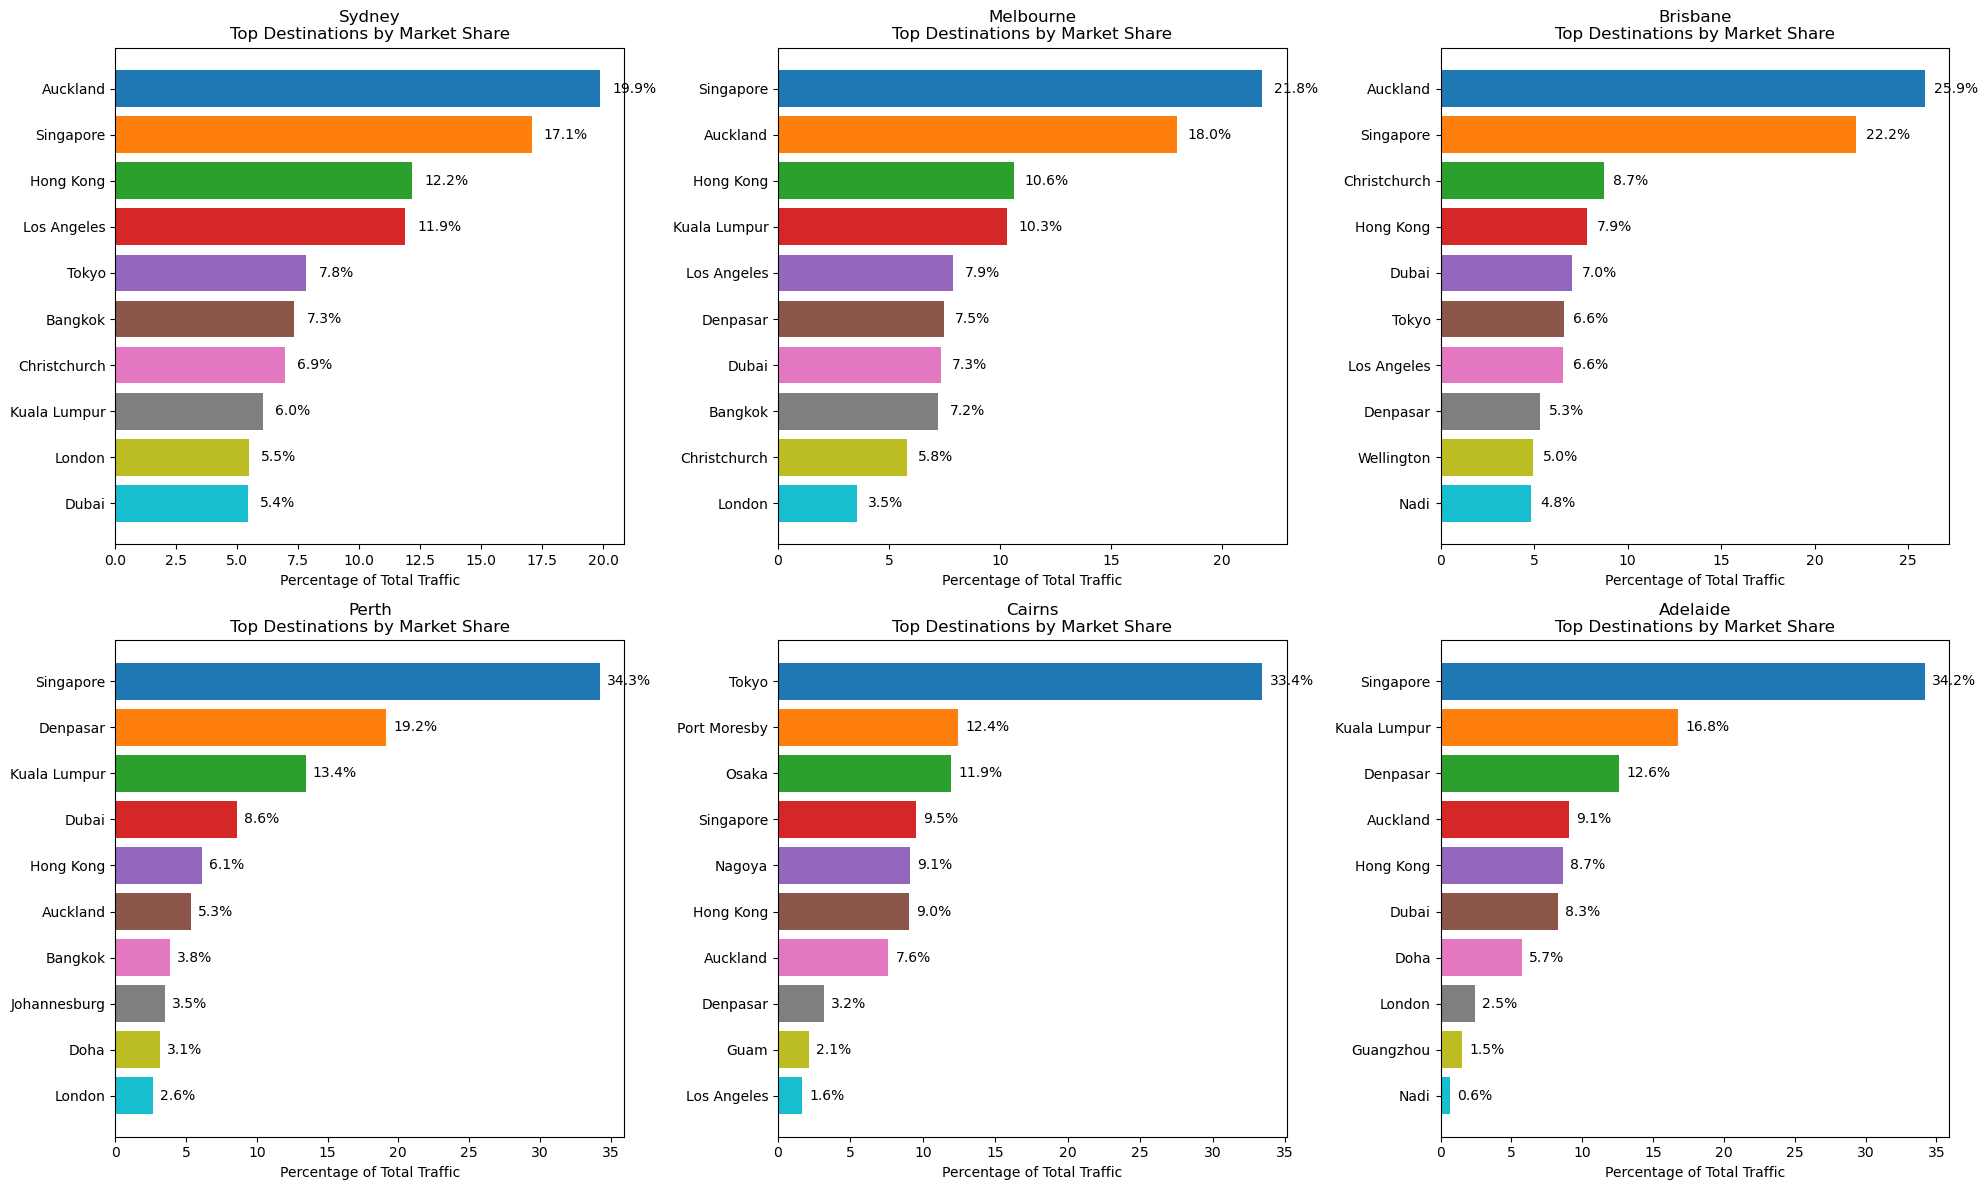

In [447]:
# Create stacked bar chart showing market share
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, (port, destinations) in enumerate(port_destinations.items()):
    # Calculate percentages
    total_passengers = destinations.sum()
    percentages = (destinations / total_passengers * 100)
    
    # Create horizontal bar chart
    colors = plt.cm.tab10(np.linspace(0, 1, len(destinations)))
    bars = axes[i].barh(range(len(destinations)), percentages.values, color=colors)
    axes[i].set_yticks(range(len(destinations)))
    axes[i].set_yticklabels(destinations.index)
    axes[i].set_xlabel('Percentage of Total Traffic')
    axes[i].set_title(f'{port}\nTop Destinations by Market Share')
    axes[i].invert_yaxis()
    
    # Add percentage labels
    for j, bar in enumerate(bars):
        width = bar.get_width()
        axes[i].text(width + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{width:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

In [448]:
# Analyse route concentration and market dominance
route_market_share = df_clean.groupby('Route')['Passengers_Total'].sum().sort_values(ascending=False)
total_passengers_all = route_market_share.sum()

# Calculate cumulative market share
route_market_share_pct = (route_market_share / total_passengers_all * 100)
cumulative_share = route_market_share_pct.cumsum()

# Find routes that make up different percentages of total traffic
routes_50_pct = (cumulative_share <= 50).sum()
routes_80_pct = (cumulative_share <= 80).sum()

print(f"\nMarket Concentration Analysis:")
print("="*50)
print(f"Total number of routes: {len(route_market_share)}")
print(f"Top {routes_50_pct} routes account for 50% of all passenger traffic")
print(f"Top {routes_80_pct} routes account for 80% of all passenger traffic")
print(f"Top route ({route_market_share.index[0]}) accounts for {route_market_share_pct.iloc[0]:.1f}% of total traffic")


Market Concentration Analysis:
Total number of routes: 805
Top 21 routes account for 50% of all passenger traffic
Top 63 routes account for 80% of all passenger traffic
Top route (Sydney - Auckland) accounts for 5.1% of total traffic


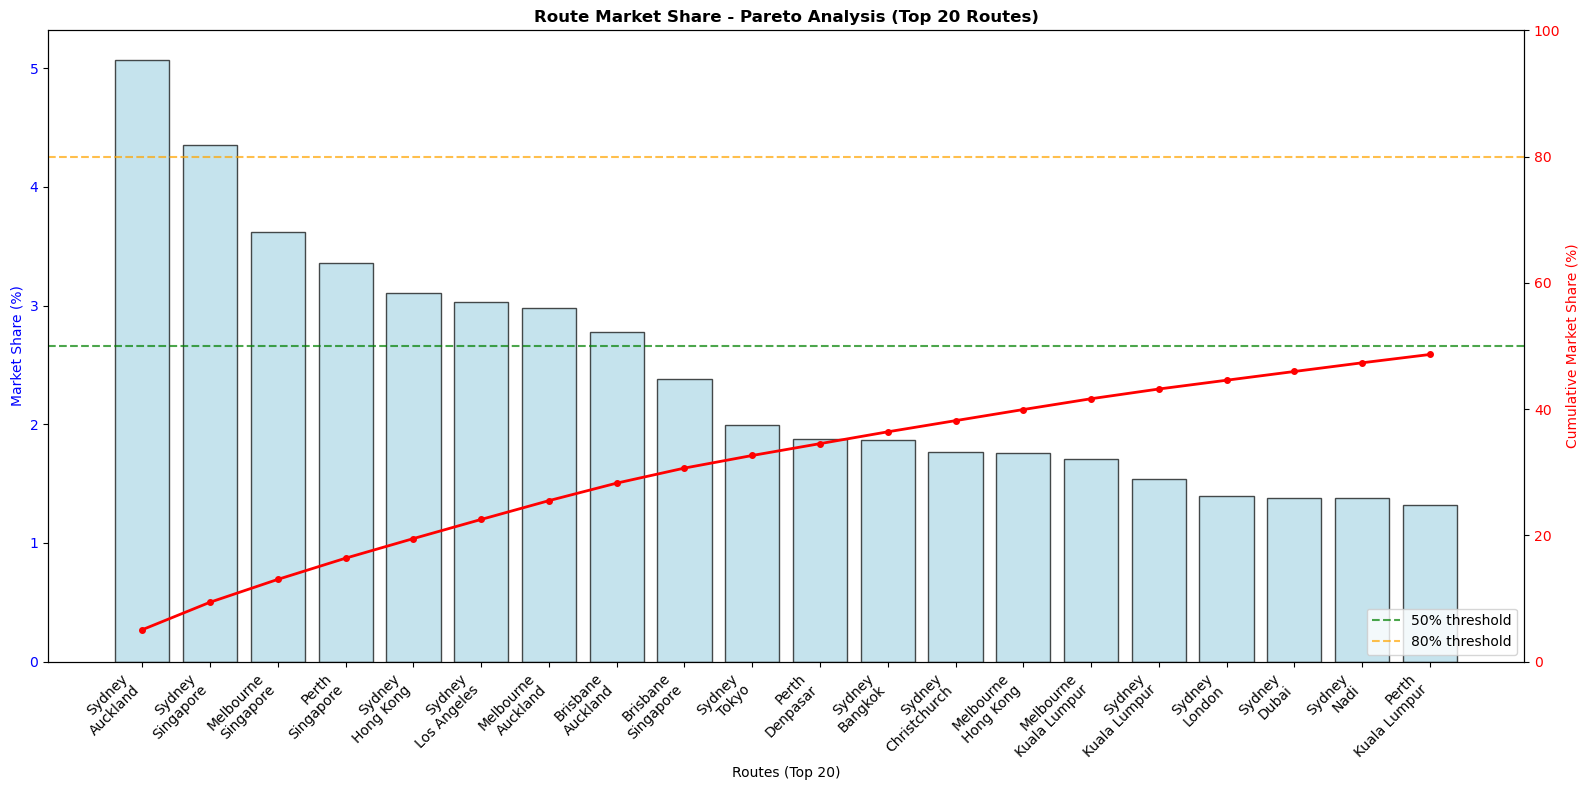

In [449]:
# Create Pareto chart
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar chart for individual route percentages (top 20)
top_20_routes = route_market_share_pct.head(20)
bars = ax1.bar(range(len(top_20_routes)), top_20_routes.values, 
               color='lightblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Routes (Top 20)')
ax1.set_ylabel('Market Share (%)', color='blue')
ax1.set_title('Route Market Share - Pareto Analysis (Top 20 Routes)', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(top_20_routes)))
ax1.set_xticklabels([route.replace(' - ', '\n') for route in top_20_routes.index], rotation=45, ha='right')

# Line chart for cumulative percentage
ax2 = ax1.twinx()
cumulative_top_20 = cumulative_share.head(20)
line = ax2.plot(range(len(cumulative_top_20)), cumulative_top_20.values, 
                color='red', marker='o', linewidth=2, markersize=4)
ax2.set_ylabel('Cumulative Market Share (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

# Add horizontal lines for 50% and 80% thresholds
ax2.axhline(y=50, color='green', linestyle='--', alpha=0.7, label='50% threshold')
ax2.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80% threshold')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

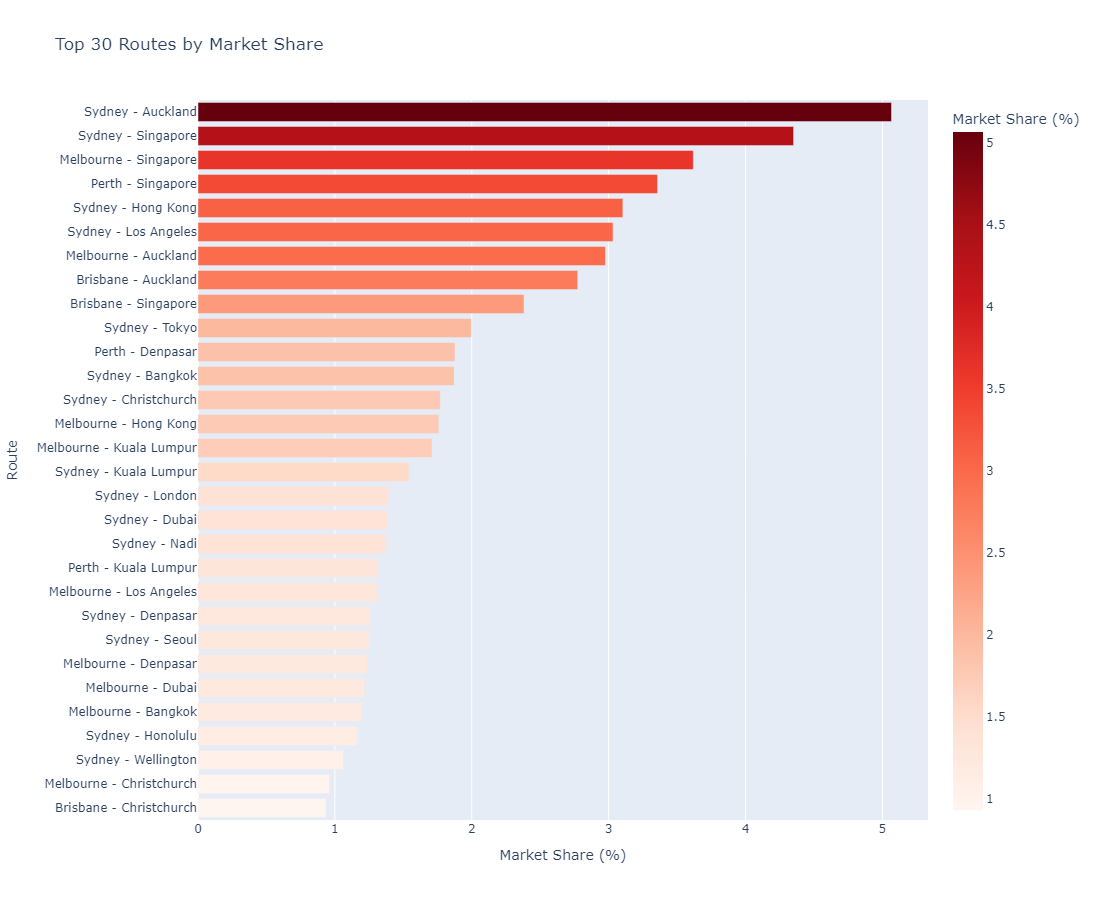

In [450]:
# Interactive market share visualization
top_30_routes = route_market_share.head(30)
route_names = [route.split(' - ') for route in top_30_routes.index]
aus_ports = [route[0] for route in route_names]
foreign_ports = [route[1] for route in route_names]

market_share_df = pd.DataFrame({
    'Route': top_30_routes.index,
    'Australian_Port': aus_ports,
    'Foreign_Port': foreign_ports,
    'Passengers': top_30_routes.values,
    'Market_Share_Pct': (top_30_routes / total_passengers_all * 100).values
})

fig_market = px.bar(
    market_share_df,
    x='Market_Share_Pct',
    y='Route',
    orientation='h',
    title='Top 30 Routes by Market Share',
    labels={'Market_Share_Pct': 'Market Share (%)', 'Route': 'Route'},
    color='Market_Share_Pct',
    color_continuous_scale='Reds'
)
fig_market.update_layout(
    height=900,
    yaxis={'categoryorder': 'total ascending'}
)
fig_market.show()

<h3>8. Correlation Analysis Between Variables</h3>

Exploring the relationships between different types of traffic and identifying patterns in inbound vs outbound traffic flows:

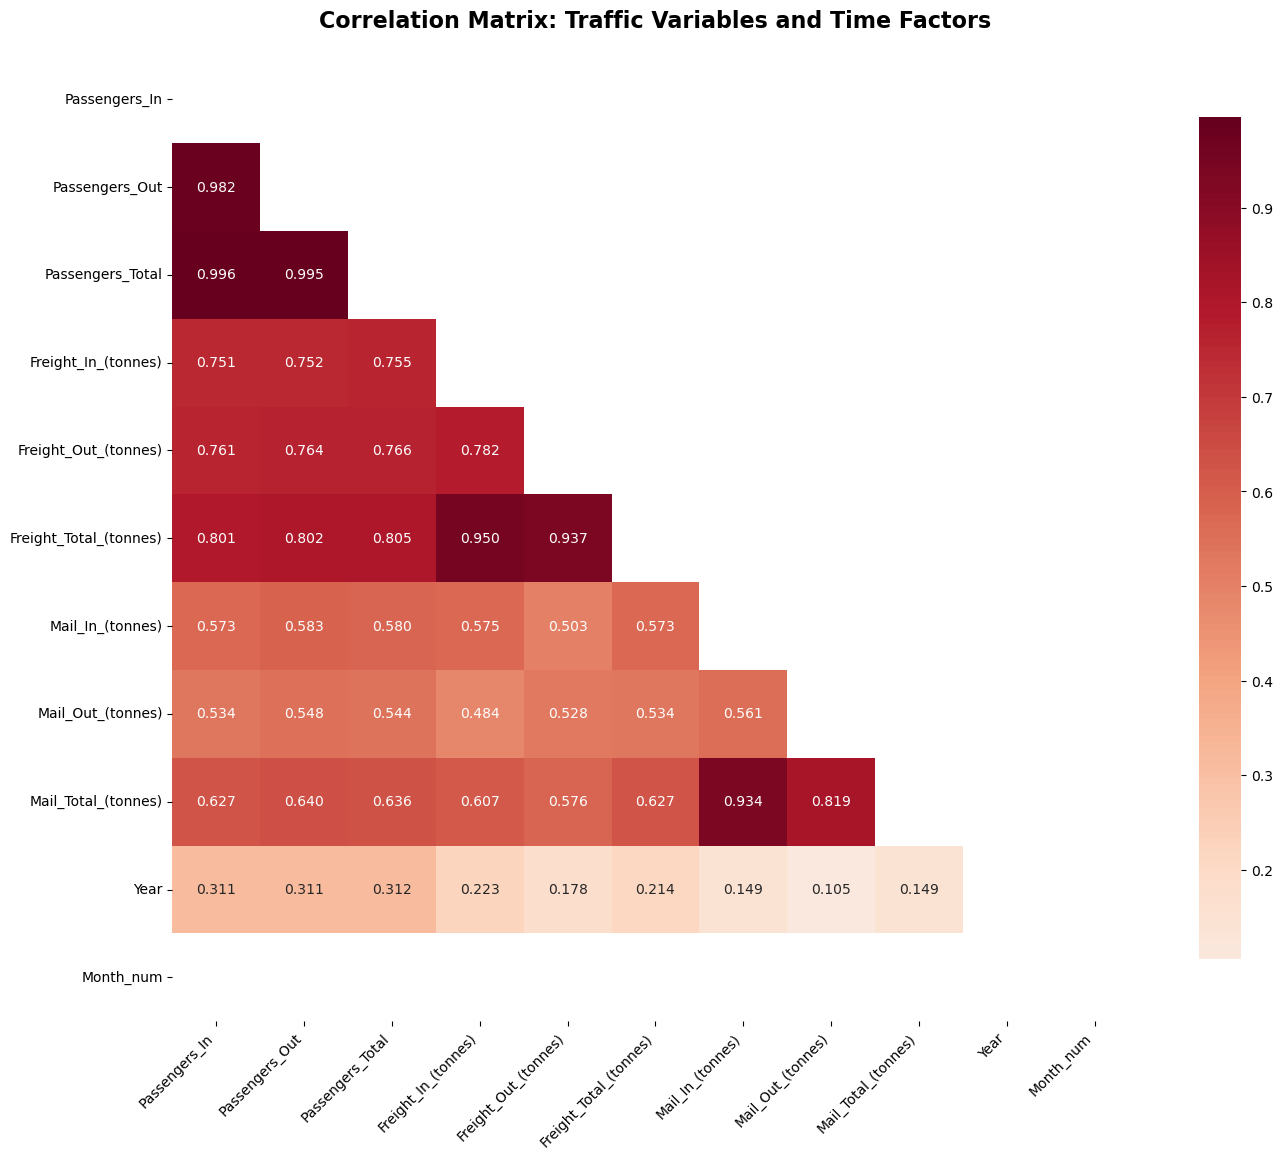

In [458]:
# Detailed correlation analysis
correlation_columns = [
    'Passengers_In', 'Passengers_Out', 'Passengers_Total',
    'Freight_In_(tonnes)', 'Freight_Out_(tonnes)', 'Freight_Total_(tonnes)',
    'Mail_In_(tonnes)', 'Mail_Out_(tonnes)', 'Mail_Total_(tonnes)',
    'Year', 'Month_num'
]

correlation_matrix = df_clean[correlation_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='RdBu_r',
            center=0,
            square=True,
            mask=mask,
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Traffic Variables and Time Factors', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

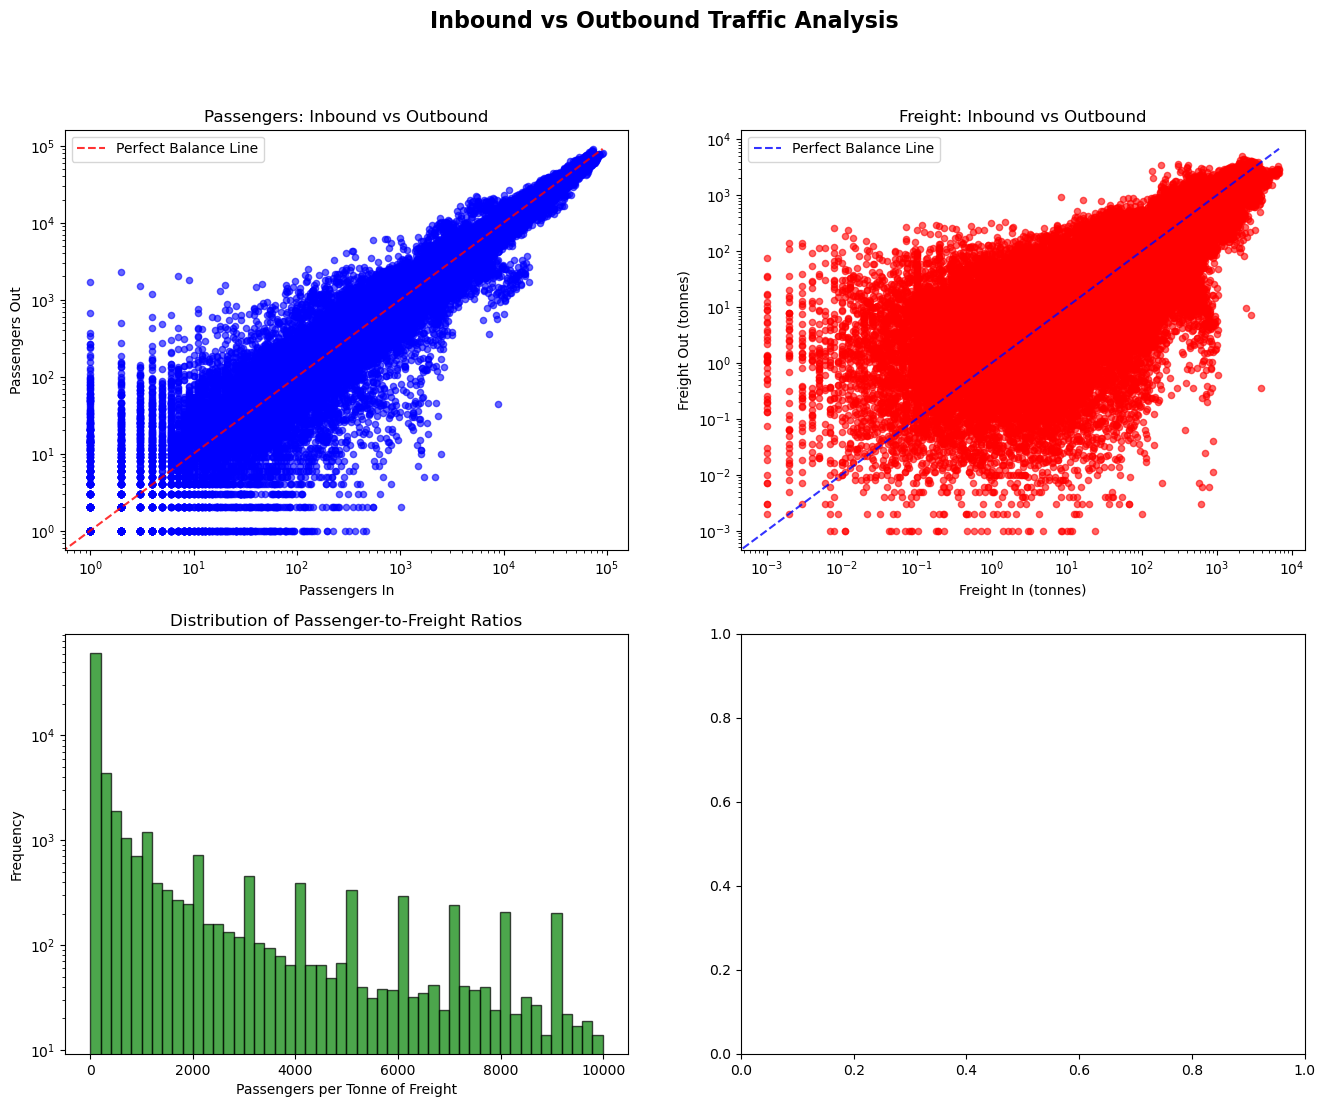

In [460]:
# Analyse inbound vs outbound patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Inbound vs Outbound Traffic Analysis', fontsize=16, fontweight='bold')

# Passenger inbound vs outbound scatter plot
valid_passenger_data = df_clean[(df_clean['Passengers_In'] > 0) & (df_clean['Passengers_Out'] > 0)]
axes[0,0].scatter(valid_passenger_data['Passengers_In'], valid_passenger_data['Passengers_Out'], 
                  alpha=0.6, s=20, color='blue')
axes[0,0].plot([0, valid_passenger_data['Passengers_In'].max()], 
               [0, valid_passenger_data['Passengers_In'].max()], 
               'r--', alpha=0.8, label='Perfect Balance Line')
axes[0,0].set_xlabel('Passengers In')
axes[0,0].set_ylabel('Passengers Out')
axes[0,0].set_title('Passengers: Inbound vs Outbound')
axes[0,0].legend()
axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')

# Freight inbound vs outbound scatter plot
valid_freight_data = df_clean[(df_clean['Freight_In_(tonnes)'] > 0) & (df_clean['Freight_Out_(tonnes)'] > 0)]
axes[0,1].scatter(valid_freight_data['Freight_In_(tonnes)'], valid_freight_data['Freight_Out_(tonnes)'], 
                  alpha=0.6, s=20, color='red')
axes[0,1].plot([0, valid_freight_data['Freight_In_(tonnes)'].max()], 
               [0, valid_freight_data['Freight_In_(tonnes)'].max()], 
               'b--', alpha=0.8, label='Perfect Balance Line')
axes[0,1].set_xlabel('Freight In (tonnes)')
axes[0,1].set_ylabel('Freight Out (tonnes)')
axes[0,1].set_title('Freight: Inbound vs Outbound')
axes[0,1].legend()
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')

# Passenger/Freight ratio analysis
passenger_freight_ratio = df_clean['Passengers_Total'] / (df_clean['Freight_Total_(tonnes)'] + 0.001)  # Add small value to avoid division by zero
axes[1,0].hist(passenger_freight_ratio[passenger_freight_ratio < 10000], bins=50, 
               color='green', alpha=0.7, edgecolor='black')
axes[1,0].set_xlabel('Passengers per Tonne of Freight')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Passenger-to-Freight Ratios')
axes[1,0].set_yscale('log')

# Time series correlation
monthly_aggregated = df_clean.groupby(['Year', 'Month_num']).agg({
    'Passengers_Total': 'sum',
    'Freight_Total_(tonnes)': 'sum',
    'Mail_Total_(tonnes)': 'sum'
}).reset_index()




In [461]:
# Statistical correlation analysis
print("Key Correlation Insights:")
print("="*50)
print(f"Passengers In vs Out correlation: {correlation_matrix.loc['Passengers_In', 'Passengers_Out']:.3f}")
print(f"Freight In vs Out correlation: {correlation_matrix.loc['Freight_In_(tonnes)', 'Freight_Out_(tonnes)']:.3f}")
print(f"Passengers vs Freight correlation: {correlation_matrix.loc['Passengers_Total', 'Freight_Total_(tonnes)']:.3f}")
print(f"Passengers vs Mail correlation: {correlation_matrix.loc['Passengers_Total', 'Mail_Total_(tonnes)']:.3f}")
print(f"Year vs Passengers correlation: {correlation_matrix.loc['Year', 'Passengers_Total']:.3f}")

# Analyze traffic balance by route
route_balance = df_clean.groupby('Route').agg({
    'Passengers_In': 'sum',
    'Passengers_Out': 'sum',
    'Freight_In_(tonnes)': 'sum',
    'Freight_Out_(tonnes)': 'sum'
}).reset_index()

route_balance['Passenger_Balance_Ratio'] = route_balance['Passengers_In'] / (route_balance['Passengers_Out'] + 1)
route_balance['Freight_Balance_Ratio'] = route_balance['Freight_In_(tonnes)'] / (route_balance['Freight_Out_(tonnes)'] + 0.001)

# Identify most imbalanced routes
most_inbound_passenger = route_balance.nlargest(10, 'Passenger_Balance_Ratio')
most_outbound_passenger = route_balance.nsmallest(10, 'Passenger_Balance_Ratio')

print(f"\nMost Inbound-Heavy Routes (High In/Out Ratio):")
print("="*50)
for _, row in most_inbound_passenger.iterrows():
    if row['Passengers_In'] > 1000:  # Filter for significant routes
        print(f"{row['Route']}: {row['Passenger_Balance_Ratio']:.2f}")

print(f"\nMost Outbound-Heavy Routes (Low In/Out Ratio):")
print("="*50)
for _, row in most_outbound_passenger.iterrows():
    if row['Passengers_Out'] > 1000:  # Filter for significant routes
        print(f"{row['Route']}: {row['Passenger_Balance_Ratio']:.2f}")

Key Correlation Insights:
Passengers In vs Out correlation: 0.982
Freight In vs Out correlation: 0.782
Passengers vs Freight correlation: 0.805
Passengers vs Mail correlation: 0.636
Year vs Passengers correlation: 0.312

Most Inbound-Heavy Routes (High In/Out Ratio):
Brisbane - Sapporo: 26416.00
Melbourne - Fuzhou: 4532.00

Most Outbound-Heavy Routes (Low In/Out Ratio):


<h3>9. Advanced Visualisations and Key Insights Summary</h3>

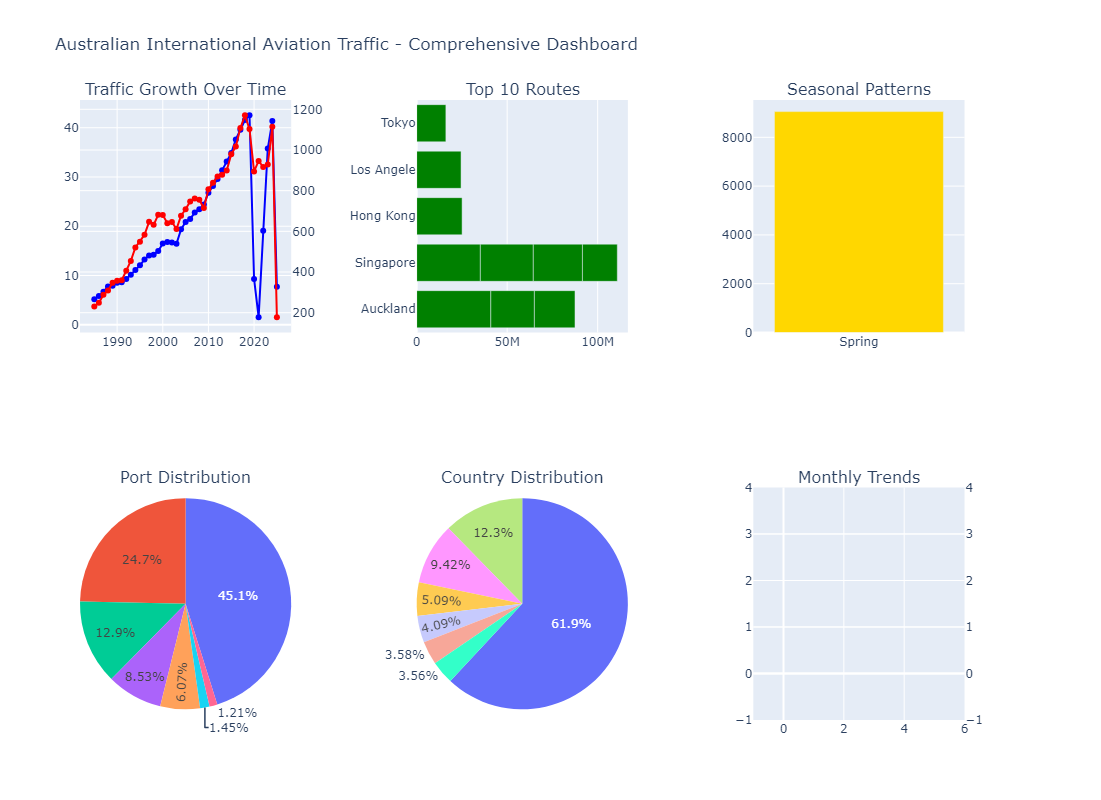

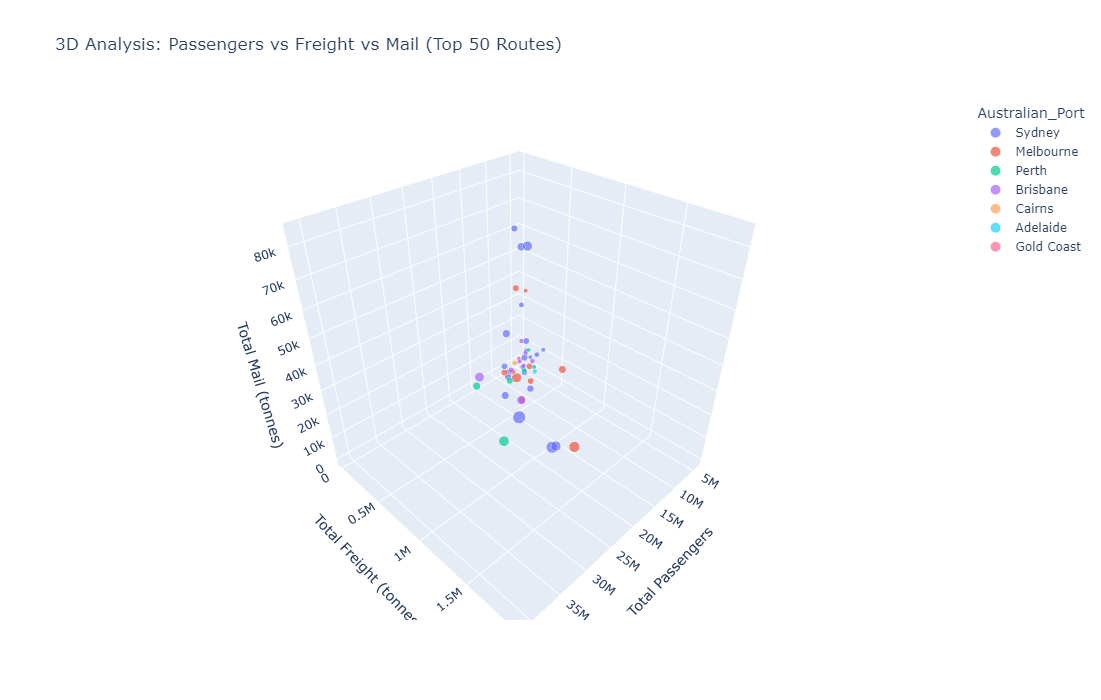

In [465]:
# Create a comprehensive dashboard-style visualisation
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Traffic Growth Over Time', 'Top 10 Routes', 'Seasonal Patterns',
                   'Port Distribution', 'Country Distribution', 'Monthly Trends'),
    specs=[[{"secondary_y": True}, {"type": "bar"}, {"type": "bar"}],
           [{"type": "pie"}, {"type": "pie"}, {"secondary_y": True}]]
)

# 1. Traffic growth over time
yearly_data = df_clean.groupby('Year').agg({
    'Passengers_Total': 'sum',
    'Freight_Total_(tonnes)': 'sum'
}).reset_index()

fig.add_trace(
    go.Scatter(x=yearly_data['Year'], y=yearly_data['Passengers_Total']/1000000,
               mode='lines+markers', name='Passengers (M)', line=dict(color='blue')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=yearly_data['Year'], y=yearly_data['Freight_Total_(tonnes)']/1000,
               mode='lines+markers', name='Freight (K tonnes)', line=dict(color='red')),
    row=1, col=1, secondary_y=True
)

# 2. Top 10 routes
top_10_routes = df_clean.groupby('Route')['Passengers_Total'].sum().nlargest(10)
fig.add_trace(
    go.Bar(x=top_10_routes.values, y=[route.split(' - ')[1][:10] for route in top_10_routes.index],
           orientation='h', name='Top Routes', marker_color='green'),
    row=1, col=2
)

# 3. Seasonal patterns
seasonal_data = df_clean.groupby('Season')['Passengers_Total'].mean()
fig.add_trace(
    go.Bar(x=seasonal_data.index, y=seasonal_data.values,
           name='Seasonal Average', marker_color=['gold', 'orange', 'lightblue', 'lightgreen']),
    row=1, col=3
)

# 4. Port distribution
top_ports = df_clean.groupby('AustralianPort')['Passengers_Total'].sum().nlargest(6)
other_ports = df_clean.groupby('AustralianPort')['Passengers_Total'].sum().iloc[6:].sum()
port_data = list(top_ports.values) + [other_ports]
port_labels = list(top_ports.index) + ['Others']

fig.add_trace(
    go.Pie(labels=port_labels, values=port_data, name="Ports"),
    row=2, col=1
)

# 5. Country distribution
top_countries = df_clean.groupby('Country')['Passengers_Total'].sum().nlargest(6)
other_countries = df_clean.groupby('Country')['Passengers_Total'].sum().iloc[6:].sum()
country_data = list(top_countries.values) + [other_countries]
country_labels = list(top_countries.index) + ['Others']

fig.add_trace(
    go.Pie(labels=country_labels, values=country_data, name="Countries"),
    row=2, col=2
)

# 6. Monthly trends
monthly_data = df_clean.groupby('Month_num').agg({
    'Passengers_Total': 'mean',
    'Freight_Total_(tonnes)': 'mean'
})

fig.add_trace(
    go.Scatter(x=monthly_data.index, y=monthly_data['Passengers_Total'],
               mode='lines+markers', name='Monthly Passengers', line=dict(color='purple')),
    row=2, col=3
)

fig.add_trace(
    go.Scatter(x=monthly_data.index, y=monthly_data['Freight_Total_(tonnes)'],
               mode='lines+markers', name='Monthly Freight', line=dict(color='orange')),
    row=2, col=3, secondary_y=True
)

# Update layout
fig.update_layout(
    height=800,
    title_text="Australian International Aviation Traffic - Comprehensive Dashboard",
    showlegend=False
)

fig.show()

# Create an interactive 3D scatter plot for advanced analysis
sample_routes = df_clean.groupby('Route').agg({
    'Passengers_Total': 'sum',
    'Freight_Total_(tonnes)': 'sum',
    'Mail_Total_(tonnes)': 'sum'
}).reset_index()

# Add route categories for coloring
sample_routes['Primary_Country'] = sample_routes['Route'].str.split(' - ').str[1].str.extract(r'([A-Za-z\s]+)')
sample_routes['Australian_Port'] = sample_routes['Route'].str.split(' - ').str[0]

# Filter for visualization (top 50 routes)
top_50_routes = sample_routes.nlargest(50, 'Passengers_Total')

fig_3d = px.scatter_3d(
    top_50_routes,
    x='Passengers_Total',
    y='Freight_Total_(tonnes)',
    z='Mail_Total_(tonnes)',
    color='Australian_Port',
    size='Passengers_Total',
    hover_name='Route',
    title='3D Analysis: Passengers vs Freight vs Mail (Top 50 Routes)',
    labels={
        'Passengers_Total': 'Total Passengers',
        'Freight_Total_(tonnes)': 'Total Freight (tonnes)',
        'Mail_Total_(tonnes)': 'Total Mail (tonnes)'
    }
)
fig_3d.update_layout(height=700)
fig_3d.show()

<h3>10. Conclusions from EDA</h3>

- The Sydney–Auckland route stands out as the most heavily trafficked international corridor, reinforcing the strength of the Australia–New Zealand aviation connection.

- International air traffic is highly concentrated between Australia’s eastern seaboard and key global hubs, particularly in New Zealand, Southeast Asia, and the United Kingdom.

- Sydney remains the primary international gateway, with Melbourne and Brisbane following as major contributors to Australia's outbound and inbound aviation flows.

- There has been a consistent upward trajectory in both passenger and freight traffic volumes over the period from 1985 to 2024.

- The growth in passenger numbers is exponential, reflecting the effects of globalization, increased mobility, and expanding airline networks.

- A parallel rise in freight volumes highlights Australia’s expanding role in global supply chains.

- Temporary disruptions align with major global events, yet the sector has shown notable resilience and recovery.

- December and January consistently register the highest levels of international passenger traffic, aligning with AU's summer and global holiday season overall.

- A secondary peak occurs during June-July, corresponding with the mid-year holidays and the Nothern Hemisphere Summer.

- The calculated seasonality index confirms substantial fluctuations in demand driven by tourism and school holiday cycles.

- International air traffic is heavily concentrated on the eastern seaboard, with Sydney, Melbourne, and Brisbane leading as the busiest international airports.

- New Zealand ranks as Australia's top international market by passenger volume.

- Strong links with Asian economies (notably Singapore, Hong Kong, Thailand, and Indonesia) support both business and tourism exchanges.

- Despite their geographical distance, long-haul destinations such as the United Kingdom and United States continue to play vital roles in Australia’s aviation network.

- A positive correlation exists between passenger and freight volumes on many routes, indicating shared infrastructure and demand drivers.

- Some routes demonstrate freight specialisation, with disproportionately high cargo volumes relative to passenger traffic.

- Mail traffic trends closely mirror passenger volumes, suggesting integrated logistics and passenger services on international routes.

- The market shows a high degree of route concentration, with the top 20 international routes accounting for a substantial share of total passenger and freight traffic.

- A Sydney-centric network is evident, as Sydney appears in the majority of high-traffic international routes.

- There is evidence of regional specialisation, with specific Australian ports catering to particular global regions based on geographic and economic linkages.



<h3>11. Strategic Implications</h3>

<h5>For Airlines and Airports</h5>

- **Capacity planning** must incorporate pronounced seasonal traffic fluctuations to maintain service efficiency and traveler satisfaction.

- **New route development** could target underserved yet emerging markets, particularly in secondary Asian or Pacific regions.

- **Hub strategies** need re-evaluation to either complement or challenge Sydney's dominance, particularly through regional airport upgrades.

<h5>For Policy Makers</h5>

- **Infrastructure investments** should align with traffic concentration and growth zones, ensuring scalability and resilience.

- **Seasonal tourism** promotion may help spread travel demand more evenly throughout the year.

- **Freight infrastructure and trade policy** improvements can enhance performance on cargo-dominant international routes.

<h5>For Future Research</h5>

- **Deeper analysis** is needed to quantify the impact of global disruptions, such as pandemics or geopolitical shifts, on aviation patterns.

- **Predictive modeling tools** could be developed for more accurate forecasting of future passenger and freight demand.

- **Aviation network analysis** could identify critical nodes and bottlenecks, informing investment and contingency planning.